**<font size="5">Applied Statistics</font>**

<font size="3">MSc in High Performance Computing Engineering, Computer Science and Engineering, Physics Engineering - A.Y. 2024-2025</font>

Prof. Mario Beraha - Dott. Vittorio Torri

---

<font size="4">**Lab 9 - Classification and Regression Trees, Random Forest, Boosting**</font>

# Libraries

In [1]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score, classification_report

In [3]:
import statsmodels.api as sm

In [4]:
np.random.seed(1234)

In [5]:
import scipy.stats as stats

# Load Dataset

In [6]:
df = pd.read_csv('heart_failure_clinical_records_dataset_smhd.csv')

In [7]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,bmi
0,75.00,0,582,0,20.73,1,265000.00,1.90,138.39,Male,0,4,True,30.82
1,55.00,0,7861,0,29.02,0,263358.03,1.10,131.90,Male,0,6,True,25.40
2,65.00,0,146,0,26.24,0,162000.00,1.30,143.66,Male,1,7,True,29.45
3,50.00,1,111,0,10.21,0,210000.00,1.90,135.03,Male,0,7,True,36.06
4,65.00,1,160,1,19.33,0,327000.00,2.70,136.08,Female,0,8,True,33.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.00,0,61,1,38.05,1,155000.00,1.10,135.58,Male,1,270,False,25.60
295,55.00,0,1820,0,35.20,0,270000.00,1.20,142.02,Female,0,271,False,29.39
296,45.00,0,2060,1,62.32,0,742000.00,0.80,136.38,Female,0,278,False,20.71
297,45.00,0,2413,0,37.49,0,140000.00,1.40,133.91,Male,1,280,False,27.76


In [8]:
cat_vars = ['anaemia', 'diabetes', 'high_blood_pressure',  'sex',  'smoking',  'DEATH_EVENT']
num_vars = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'bmi', 'time']#, 'rehospitalizations']

# Decision Trees

Very simple and interpretable model

Train Accuracy: 0.98
Test Accuracy:  0.97
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



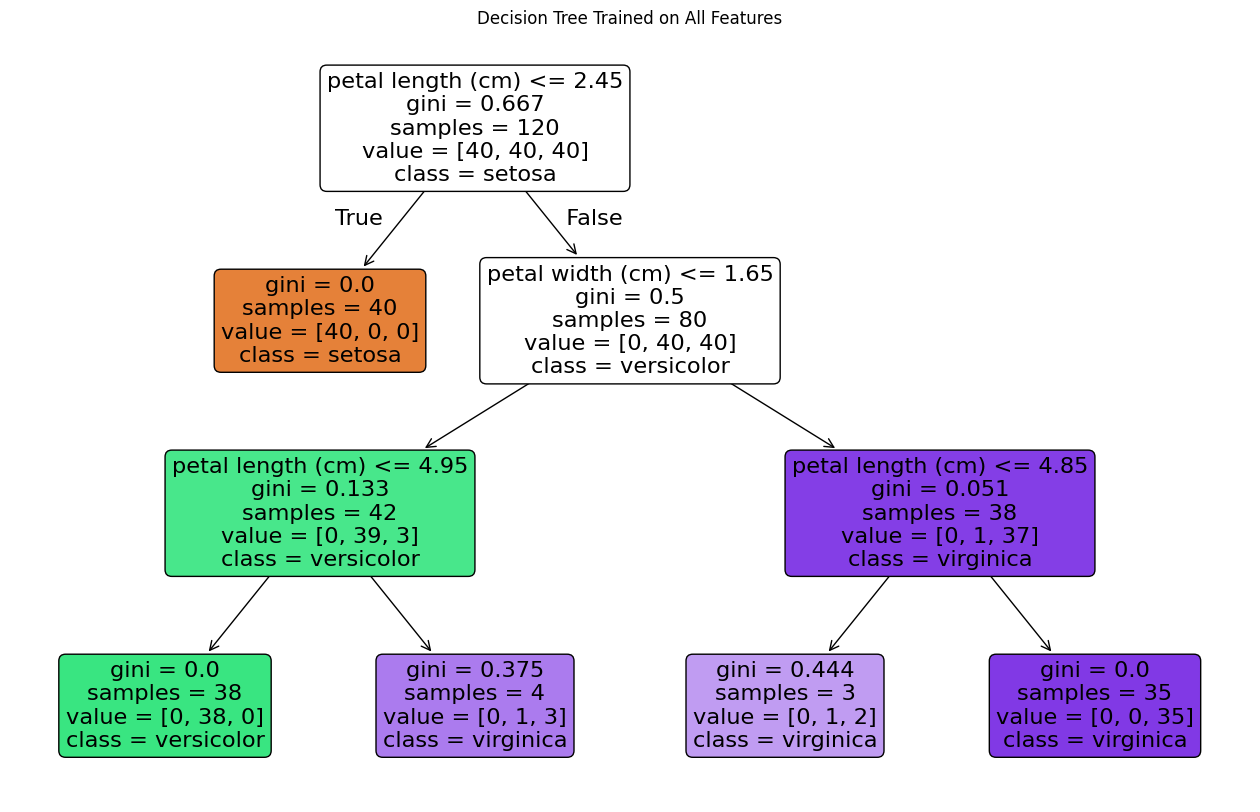

In [10]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

# Load data
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

# Train decision tree using all features => CLASSIFICATION
clf = DecisionTreeClassifier(max_depth=3, random_state=42) #max depth is the number of levels to go down from the root (most critical hyperparam).
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
train_acc = accuracy_score(y_train, clf.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy:  {test_acc:.2f}")
print(classification_report(y_test, y_pred, target_names=target_names))

# Tree Visualization
plt.figure(figsize=(16, 10))
plot_tree(clf, feature_names=feature_names, class_names=target_names, filled=True, rounded=True)
plt.title("Decision Tree Trained on All Features")
plt.show()

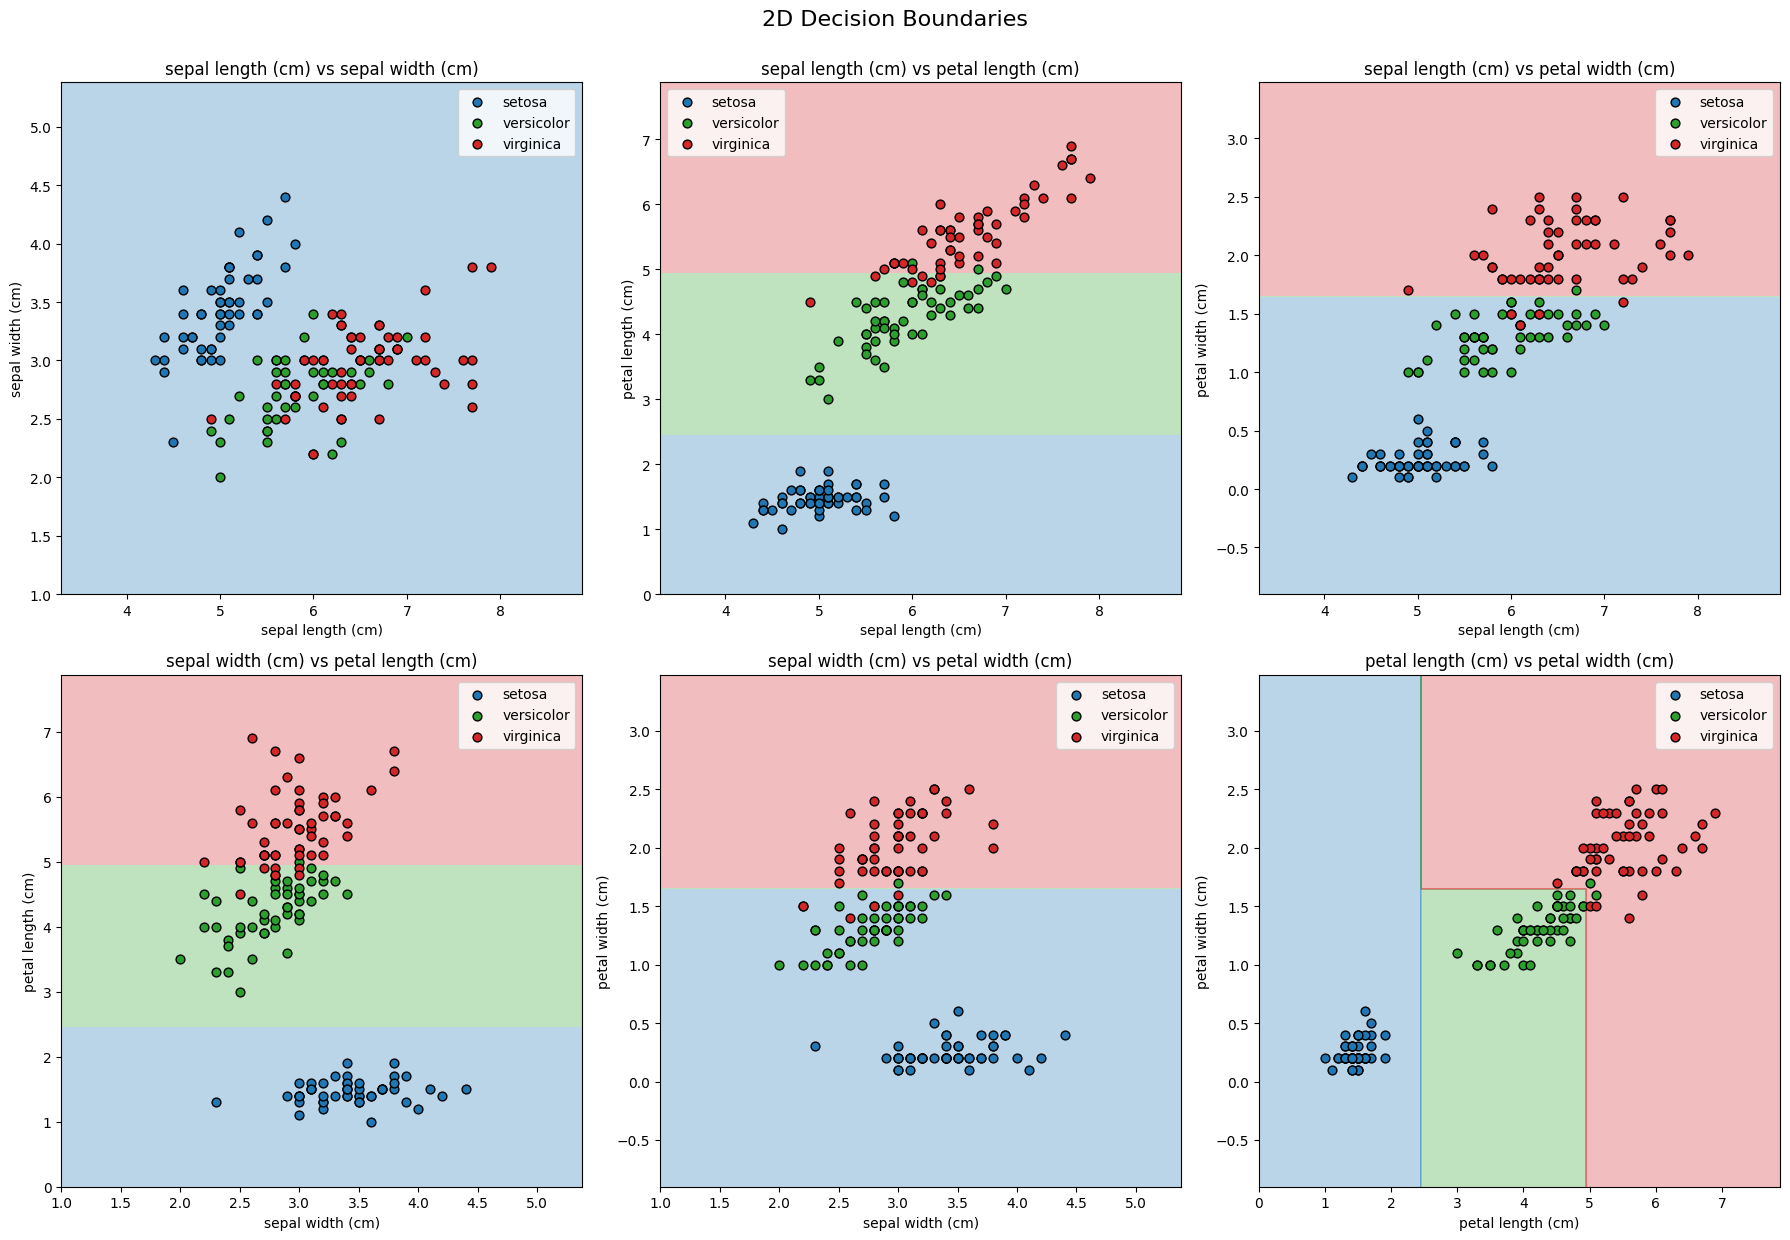

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
from matplotlib.colors import ListedColormap

#the higher the gini, the worse the classification is. i.e. gini = 0 => MAX PURITY

# Define class-specific colors
class_colors = ['#1f77b4', '#2ca02c', '#d62728']  # blue, green, red
cmap_light = ListedColormap(class_colors)

# All feature pairs
pairs = list(itertools.combinations(range(X.shape[1]), 2))
plot_step = 0.02
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, (i, j) in enumerate(pairs):
    ax = axes[idx]

    # Create mesh for the selected feature pair
    x_min, x_max = X[:, i].min() - 1, X[:, i].max() + 1
    y_min, y_max = X[:, j].min() - 1, X[:, j].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    # Input for prediction (other features fixed)
    X_slice = np.zeros((xx.ravel().shape[0], X.shape[1]))
    X_slice[:, i] = xx.ravel()
    X_slice[:, j] = yy.ravel()
    for k in range(X.shape[1]):
        if k != i and k != j:
            X_slice[:, k] = X[:, k].mean()

    Z = clf.predict(X_slice).reshape(xx.shape)

    # Plot decision surface
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

    # Plot data points
    for class_idx, class_color in enumerate(class_colors):
        ax.scatter(X[y == class_idx, i],
                   X[y == class_idx, j],
                   label=target_names[class_idx],
                   c=class_color, edgecolor='k', s=40)

    ax.set_xlabel(feature_names[i])
    ax.set_ylabel(feature_names[j])
    ax.set_title(f"{feature_names[i]} vs {feature_names[j]}")
    ax.legend()

plt.tight_layout()
plt.suptitle("2D Decision Boundaries", fontsize=16, y=1.03)
plt.show()


Different criteria can be used to decide where to split:

$$\text{Gini}(t) = 1 - \sum_{i=1}^{C} p_i^2$$

$$\Delta \text{Gini} = \text{Gini}_{\text{parent}} - \left( \frac{N_L}{N} \cdot \text{Gini}_L + \frac{N_R}{N} \cdot \text{Gini}_R \right)$$

$$\text{Entropy}(t) = -\sum_{i=1}^{C} p_i \log_2 p_i
$$

$$\text{Information Gain} = \text{Entropy}_{\text{parent}} - \left( \frac{N_L}{N} \cdot \text{Entropy}_L + \frac{N_R}{N} \cdot \text{Entropy}_R \right)
$$

Both measures are biased toward variables with many levels




In [11]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42) #criteria to fit the model = entropy

clf_gini.fit(X_train, y_train)
clf_entropy.fit(X_train, y_train)

print(f"Gini Test Accuracy:    {accuracy_score(y_test, clf_gini.predict(X_test)):.2f}")
print(f"Entropy Test Accuracy: {accuracy_score(y_test, clf_entropy.predict(X_test)):.2f}")


Gini Test Accuracy:    0.97
Entropy Test Accuracy: 0.97


We can measure feature importance as the (weighted) sum of the delta gini / entropy in all nodes in which it was used

$$
\text{Importance of feature } j = \sum_{\text{nodes } t \text{ using } j} \frac{N_t}{N} \cdot \Delta \text{Impurity}_t
$$

In [13]:
#Measure of importance of the feature j (how your metric improves when splitting on covariate j)
importances = clf.feature_importances_
for name, score in sorted(zip(feature_names, importances), key=lambda x: -x[1]):
    print(f"{name:25s}: {score:.3f}")

#the higher the value, the more the feature is relevant to explain your target variable

petal length (cm)        : 0.579
petal width (cm)         : 0.421
sepal length (cm)        : 0.000
sepal width (cm)         : 0.000


## Depth control

Depth of the tree is a critical parameter:

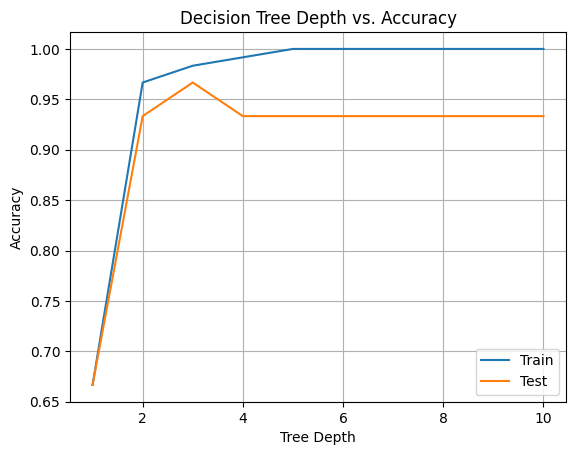

In [14]:
depths = range(1, 11)
train_scores = []
test_scores = []

#The complexity of the model increases with more depth, so to select the right depth is a sort of Bias-Variance trade - off.
for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.plot(depths, train_scores, label="Train")
plt.plot(depths, test_scores, label="Test")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Depth vs. Accuracy")
plt.legend()
plt.grid(True)
plt.show()


with increasing the depth obv the accuracy of the training set will increase (more complexity => accuracy training set increases ) but we are more prone to OVERFITTING

If you want to to the pruning during fitting:

In [16]:
#PRUNING
#alpha is a shrinakge parameter on the depth of the subtree

#Evaluate different levels of tree complexity (via ccp_alpha) and see how they affect the model's test accuracy.
path = clf.cost_complexity_pruning_path(X_train, y_train) #set of aplhas at which at every alpha we reduce the depth by 1
alphas = path.ccp_alphas[:-1]  # skip last (trivial) tree

for alpha in alphas:
    clf_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    clf_pruned.fit(X_train, y_train)
    print(f"Alpha: {alpha:.5f} | Test Accuracy: {clf_pruned.score(X_test, y_test):.3f}")

#So you are finding values of alpha (penalization parameter for the max depth used to train the model) vs TEST ACCURACY
#this is the process to evaluate the best alpha that gives the best generalization (accuracy on unseen data) (and the best trade off of the depth)

Alpha: 0.00000 | Test Accuracy: 0.933
Alpha: 0.00625 | Test Accuracy: 0.967
Alpha: 0.00811 | Test Accuracy: 0.967
Alpha: 0.03393 | Test Accuracy: 0.933
Alpha: 0.27068 | Test Accuracy: 0.667


`clf.cost_complexity_pruning_path(X_train, y_train)` returns the effective alphas (regularization strengths) at which:

*   Removing a branch would minimally increase the total impurity
*   But reduce model complexity (number of leaves)

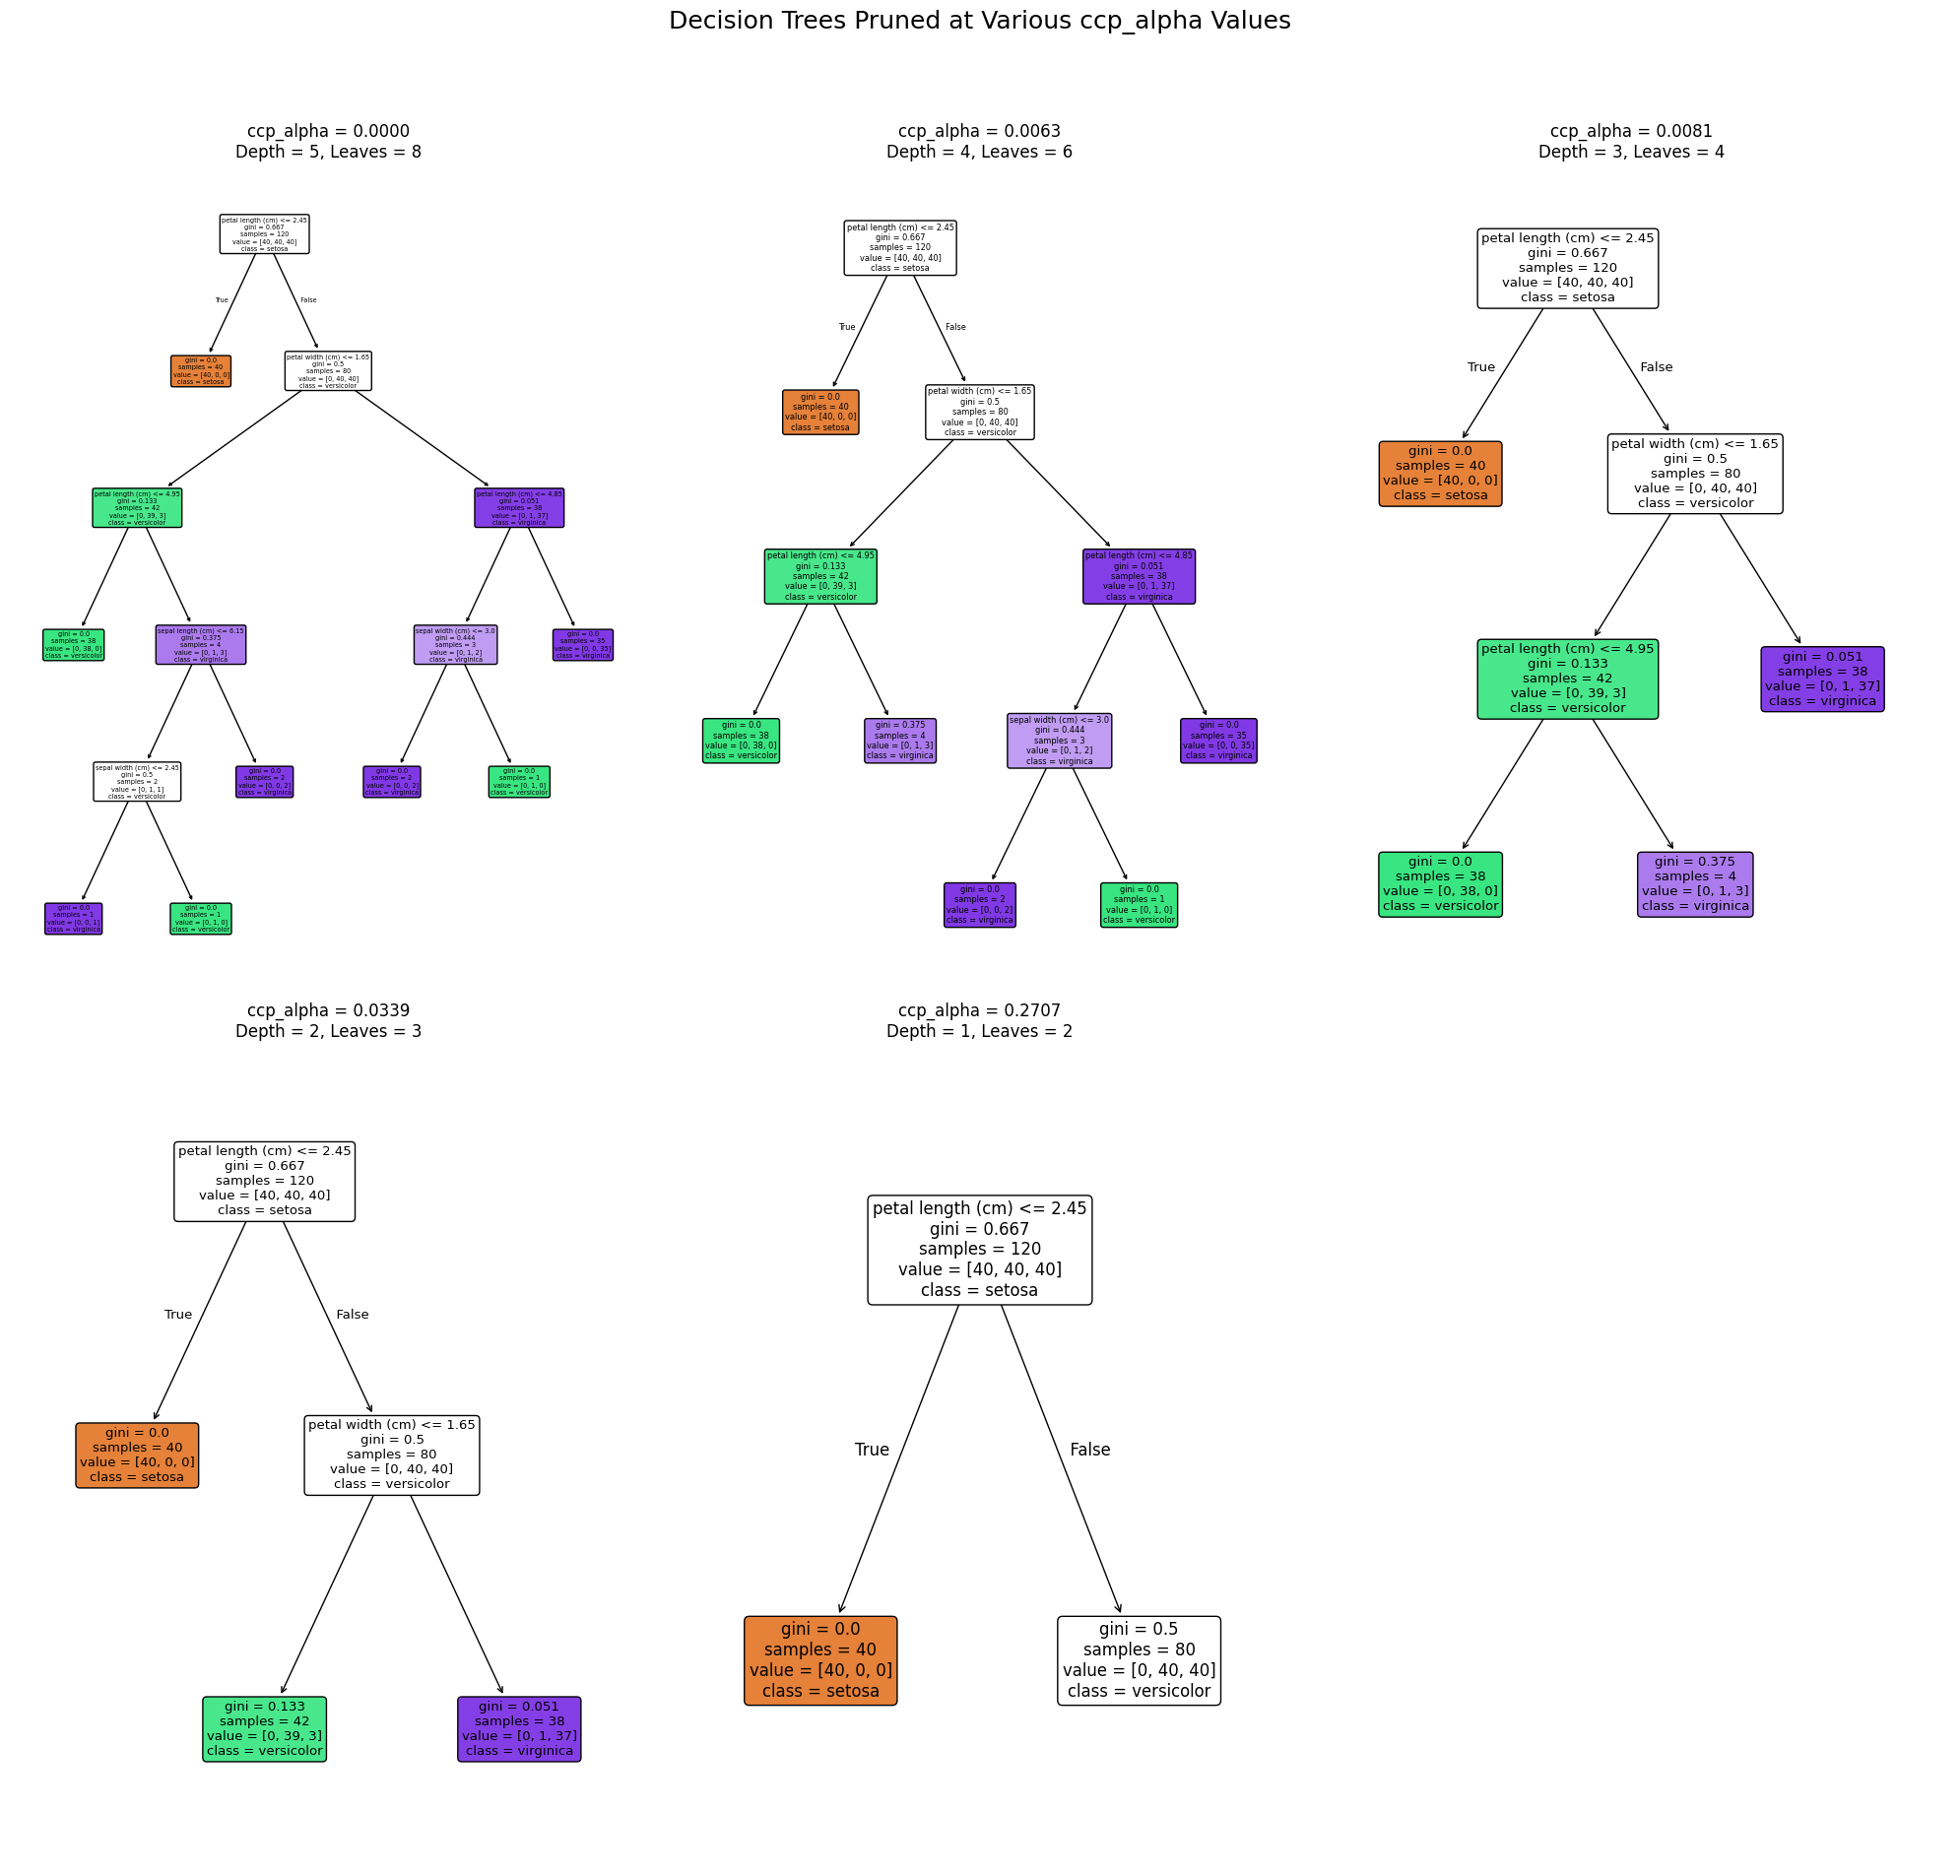

In [17]:
# Get pruning path
clf = DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]  # exclude the last alpha (always leads to root-only tree)

# Train a tree for each alpha
clfs = []
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Plot the trees for a selected subset of alpha values
n_trees_to_plot = min(6, len(clfs))  # limit to 6 for clarity
indices_to_plot = np.linspace(0, len(clfs) - 1, n_trees_to_plot, dtype=int)

plt.figure(figsize=(20, 20))
for i, idx in enumerate(indices_to_plot):
    clf = clfs[idx]
    plt.subplot(2, 3, i + 1)
    plot_tree(clf,
              filled=True,
              rounded=True,
              class_names=target_names,
              feature_names=feature_names)
    plt.title(f"ccp_alpha = {ccp_alphas[idx]:.4f}\nDepth = {clf.get_depth()}, Leaves = {clf.get_n_leaves()}")
plt.suptitle("Decision Trees Pruned at Various ccp_alpha Values", fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Selection of ccp_alpha can be done via CV:

Best ccp_alpha: 0.00000 with CV accuracy: 0.9417
Test accuracy of pruned tree: 0.9333


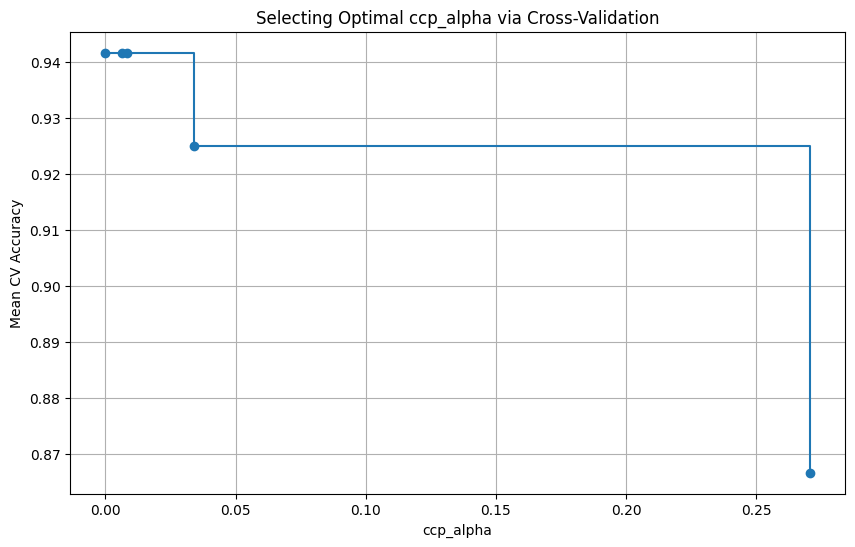

In [ ]:
#Find the optimal alpha via cross-validation
#CV : alpha_optimal => sub_tree_optimal
from sklearn.model_selection import cross_val_score

# Step 1: Get pruning path
clf = DecisionTreeClassifier(random_state=1234)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]  # skip the last one (trivial tree)

# Step 2: Train trees with different alphas + CV
clfs = []
cv_scores = []

for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    clfs.append(clf)
    cv_scores.append(scores.mean())

# Step 3: Select best alpha
best_idx = np.argmax(cv_scores)
best_alpha = ccp_alphas[best_idx]
print(f"Best ccp_alpha: {best_alpha:.5f} with CV accuracy: {cv_scores[best_idx]:.4f}")

# Step 4: Retrain final model on full training set with best alpha
final_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
final_tree.fit(X_train, y_train)

# Evaluate on test set
test_acc = final_tree.score(X_test, y_test)
print(f"Test accuracy of pruned tree: {test_acc:.4f}")

# Step 5: Plot alpha vs. CV accuracy
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, cv_scores, marker='o', drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("Mean CV Accuracy")
plt.title("Selecting Optimal ccp_alpha via Cross-Validation")
plt.grid(True)
plt.show()

In this case i can use the 3 alpha

# Regression Tree

Output: average of the responses (in the training set) in the subregion

In [18]:
from sklearn.tree import DecisionTreeRegressor

# Separate features/target
X = df.drop(columns='ejection_fraction')
y = df['ejection_fraction']

numeric_vars = num_vars.copy()
numeric_vars.remove('ejection_fraction')
categorical_vars = cat_vars.copy()

# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_vars),
    ('cat', OneHotEncoder(drop='first'), categorical_vars)
])

# Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42, max_depth=4))
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Adjusted R²
r2 = r2_score(y_test, y_pred)
n = len(y_test)
p = preprocessor.fit(X_train).transform(X_train).shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

# Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score:       {r2:.3f}")
print(f"Adjusted R²:    {adj_r2:.3f}")
print(f"MSE:            {mse:.3f}")
print(f"MAE:            {mae:.3f}")


R² Score:       0.363
Adjusted R²:    0.183
MSE:            110.892
MAE:            7.924


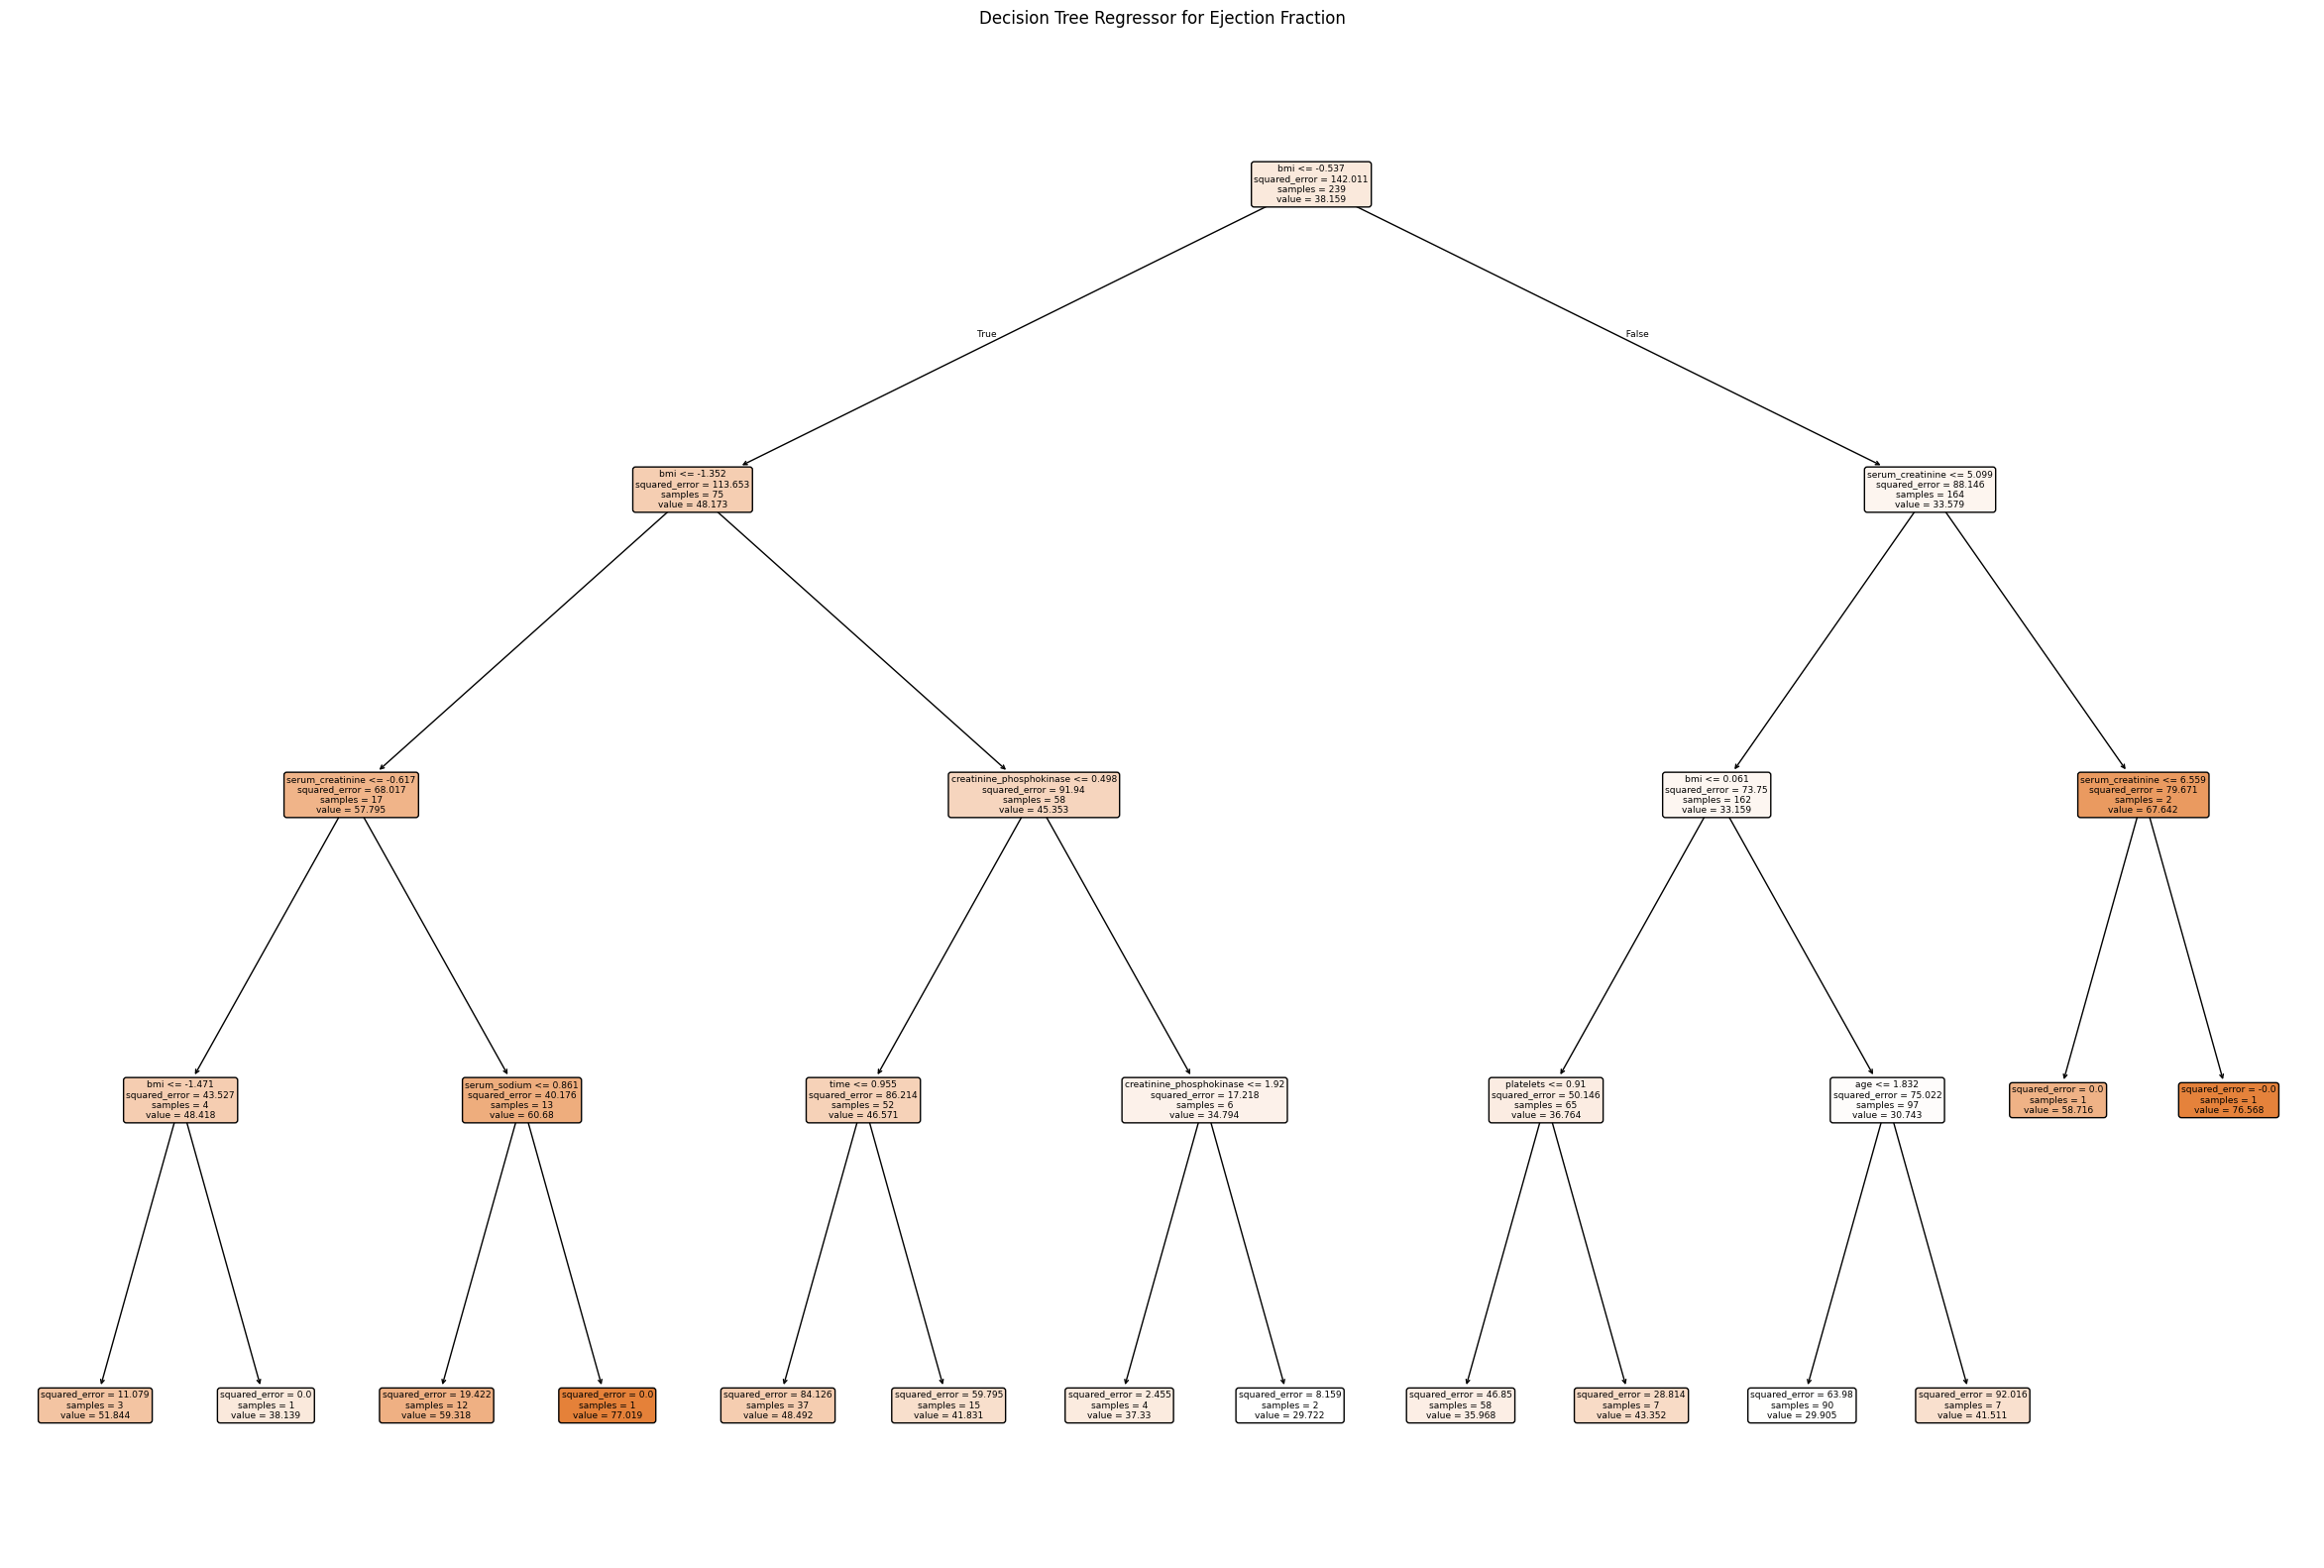

In [19]:
# Get feature names after encoding
encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_vars)
all_feature_names = numeric_vars + list(encoded_feature_names)

# Plot the tree
reg_tree = pipeline.named_steps['regressor']

plt.figure(figsize=(30, 20))
plot_tree(reg_tree,
          feature_names=all_feature_names,
          filled=True,
          rounded=True,)
plt.title("Decision Tree Regressor for Ejection Fraction")
plt.show()

# Random Forest

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
#AVERAGING all the predictions from all the trees to reduce the variance of a new prediction / Num_trees

# Load data
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42) #Hyperparams: n_trees = n_estimators, depth, m (predictors)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

Test Accuracy: 0.933

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



Average the prediction of all the trees => REDUCES THE VARIANCE

## Hyperparameters

Recommended values are $m=p/3$ for regression and $m=\sqrt{p}$ for classification, with m being the % of features to keep (max_features)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define hyperarameter grid
param_grid = {
    'n_estimators': [10, 50, 100], #number of trees in the forest
    'max_depth': [None, 3, 5, 10],
    'max_features': ['sqrt', 'log2', None]  # or you can use int values , these are the number of features to consider at each split for the tress
}
#ma_features = m = the amount of features each tree considers for the splits

# Setup grid search
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_
print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Best CV Accuracy: {grid_search.best_score_:.3f}")

# Test performance
y_pred = best_rf.predict(X_test)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))


Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 10}
Best CV Accuracy: 0.958

Test Accuracy: 0.9666666666666667

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## Out-Of-Bag evaluation



1.   For each training point, collect predictions from only the trees that didn’t see it.
2.  Compare these predictions to the true labels.
3.  Average the accuracy (or other metric) over all such point






In [23]:
rf_oob = RandomForestClassifier(oob_score=True, n_estimators=100, random_state=42)
rf_oob.fit(X, y)
print("OOB Score:", rf_oob.oob_score_)

#each bagged tree only sees 2/3 n samples to build the tree, you the out of bag 1/3n to do a "free " MSE(validation) to estimate the test error

OOB Score: 0.9533333333333334


The scikit-learn OOB implementation is limited to accuracy for classification and R^2 for regression. Other metrics can be computed by accessing the OOB predictions:

In [24]:
#if you want other metrics
from sklearn.metrics import f1_score

y_pred_oob = np.argmax(rf_oob.oob_decision_function_, axis=1)
f1 = f1_score(y, y_pred_oob, average='macro')
print(f"OOB F1 Score (macro): {f1:.3f}")

OOB F1 Score (macro): 0.953


## Interpretation

Since Random forest looses interpretability, we gain other metrics of interpretations:

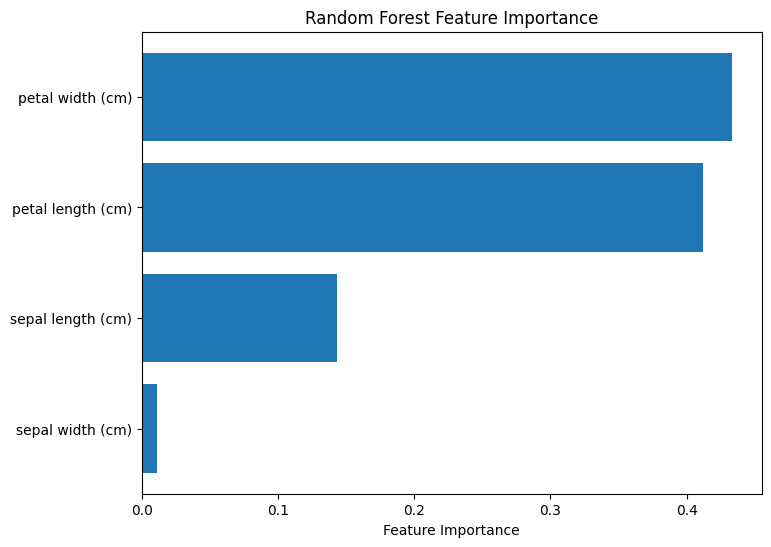

In [25]:
importances = best_rf.feature_importances_
sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 6))
plt.barh(np.array(feature_names)[sorted_idx], importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.show()

Partial Dependency Plots

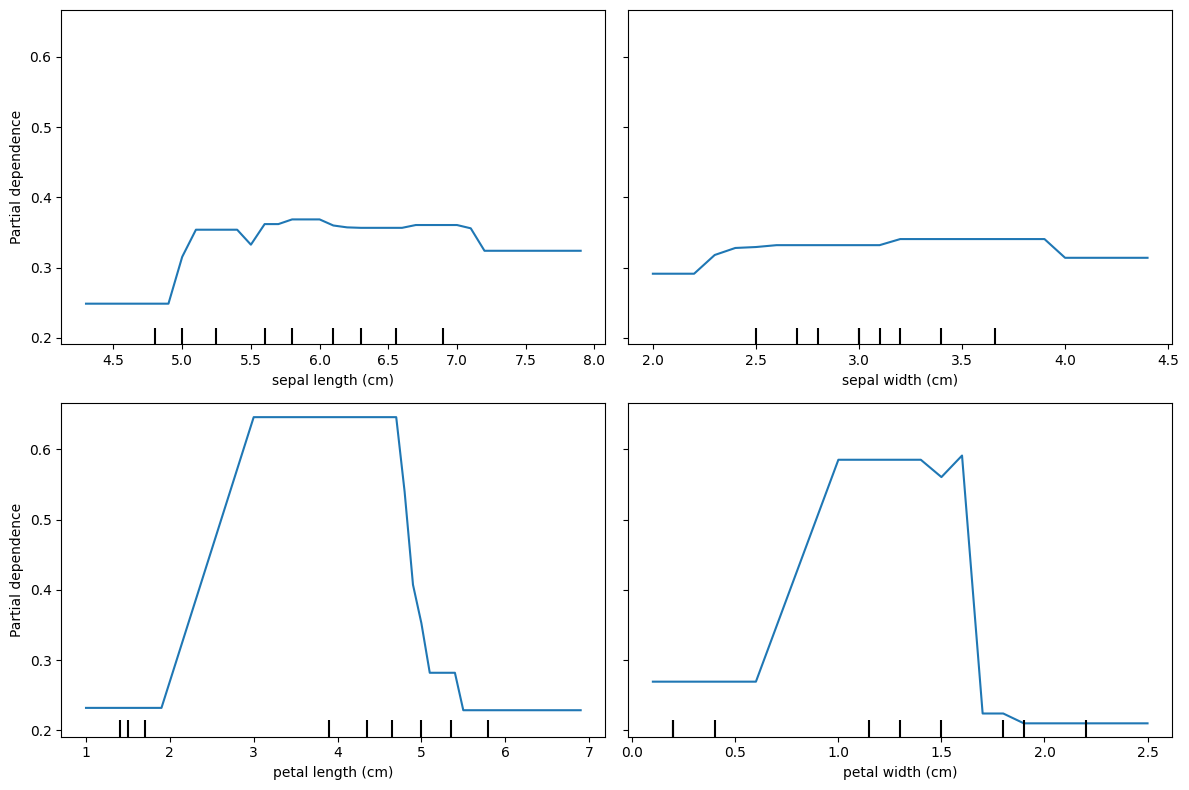

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(2, 2, figsize=(12, 8))  # Adjust as needed
PartialDependenceDisplay.from_estimator(best_rf, X, features=[0, 1, 2, 3], feature_names=feature_names, target=1, ax=ax)
plt.tight_layout()
plt.show()
#Partial dep plots help us to visualize how your model responds to changes in individual features
#A non flat behavoiur helps us to understand which feature is more relevant to your model to understand how each one influences the predicted probability of class 1

## Random Forest for Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Separate features/target
X = df.drop(columns='ejection_fraction')
y = df['ejection_fraction']

numeric_vars = num_vars.copy()
numeric_vars.remove('ejection_fraction')
categorical_vars = cat_vars.copy()

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_vars),
    ('cat', OneHotEncoder(drop='first'), categorical_vars)
])

# Full pipeline with RandomForestRegressor
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Adjusted R²
r2 = r2_score(y_test, y_pred)
n = len(y_test)
p = preprocessor.fit(X_train).transform(X_train).shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Output
rf_model = pipeline.named_steps['model']
print(f"OOB R²: {rf_model.oob_score_:.3f}")
print(f"R²:        {r2:.3f}")
print(f"Adjusted R²:    {adj_r2:.3f}")
print(f"MSE:            {mse:.2f}")
print(f"MAE:            {mae:.2f}")


OOB R²: 0.413
R²:        0.567
Adjusted R²:    0.445
MSE:            75.41
MAE:            6.92


# Gradient Boosting

every time you build a sequential tree based on the RESIDUALS of the prev tree.

easily prone to overfitting


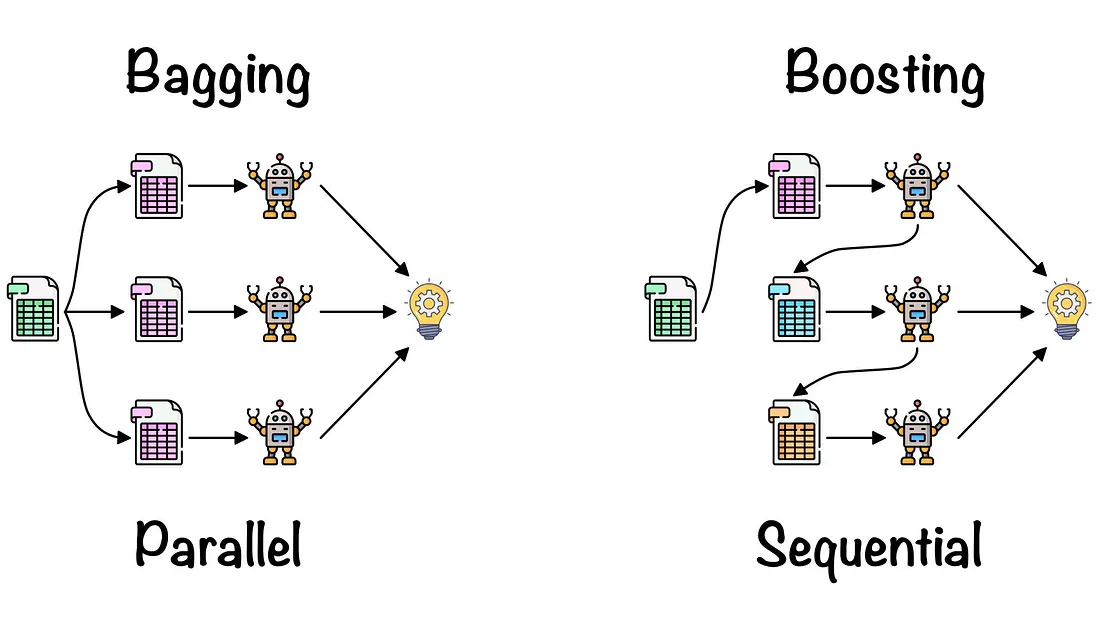

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

# Separate features/target
X = df.drop(columns='ejection_fraction')
y = df['ejection_fraction']

numeric_vars = num_vars.copy()
numeric_vars.remove('ejection_fraction')
categorical_vars = cat_vars.copy()

# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_vars),
    ('cat', OneHotEncoder(drop='first'), categorical_vars)
])

# Pipeline with Gradient Boosting
# Next Tree is focused on learning the high residuals
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42))
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit model
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Adjusted R²
r2 = r2_score(y_test, y_pred)
n = len(y_test)
p = preprocessor.fit(X_train).transform(X_train).shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Output
print(f"R²:        {r2:.3f}")
print(f"Adjusted R²:    {adj_r2:.3f}")
print(f"MSE:            {mse:.2f}")
print(f"MAE:            {mae:.2f}")


R²:        0.487
Adjusted R²:    0.399
MSE:            88.06
MAE:            7.56


## Manual implementation

In [27]:
from sklearn.tree import DecisionTreeRegressor

# -----------------------------
# Data generation and plotting
# -----------------------------

def GenerateData():
    X = np.arange(0, 50).reshape(-1, 1)

    y = np.concatenate([
        np.random.uniform(10, 15, 10),
        np.random.uniform(20, 25, 10),
        np.random.uniform(0, 5, 10),
        np.random.uniform(30, 32, 10),
        np.random.uniform(13, 17, 10)
    ])

    return X, y.reshape(-1, 1)

def PlotModel(X, y, yp, title='', fn=None):
    plt.figure(figsize=(20,10))
    plt.scatter(X, y, color='blue', label='True y')
    plt.plot(X, yp, color='red', label='Prediction')
    plt.xlim([-1, 51])
    plt.ylim([-1, 35])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.legend()
    if fn:
        plt.savefig(fn)
    plt.show()

def PlotResidual(X, residuals, title='', fn=None):
    plt.figure(figsize=(20,10))
    plt.scatter(X, residuals, color='green')
    plt.xlim([-1, 51])
    plt.ylim([-25, 25])
    plt.xlabel('x')
    plt.ylabel('residual')
    plt.title(title)
    if fn:
        plt.savefig(fn)
    plt.show()

# -----------------------------
# Gradient Boosting Logic
# -----------------------------

def GradientBoosting(X, y, n_iterations=30, max_depth=1, plot=True):
    # Initial prediction is the mean
    initial_pred = np.ones_like(y) * y.mean()
    prediction = initial_pred.copy()

    if plot:
        PlotModel(X, y, initial_pred, title='Iteration #1 - Initial Mean')
        PlotResidual(X, y - prediction, title='Iteration #1 - Residual')

    for i in range(n_iterations):
        residuals = y - prediction

        stump = DecisionTreeRegressor(max_depth=max_depth)
        stump.fit(X, residuals)
        update = stump.predict(X).reshape(-1, 1)

        prediction += update

        if plot and (i+2)%5==0:
            PlotModel(X, y, prediction, title=f'Iteration #{i+2} - Model')
            PlotResidual(X, y - prediction, title=f'Iteration #{i+2} - Residual')

    return prediction

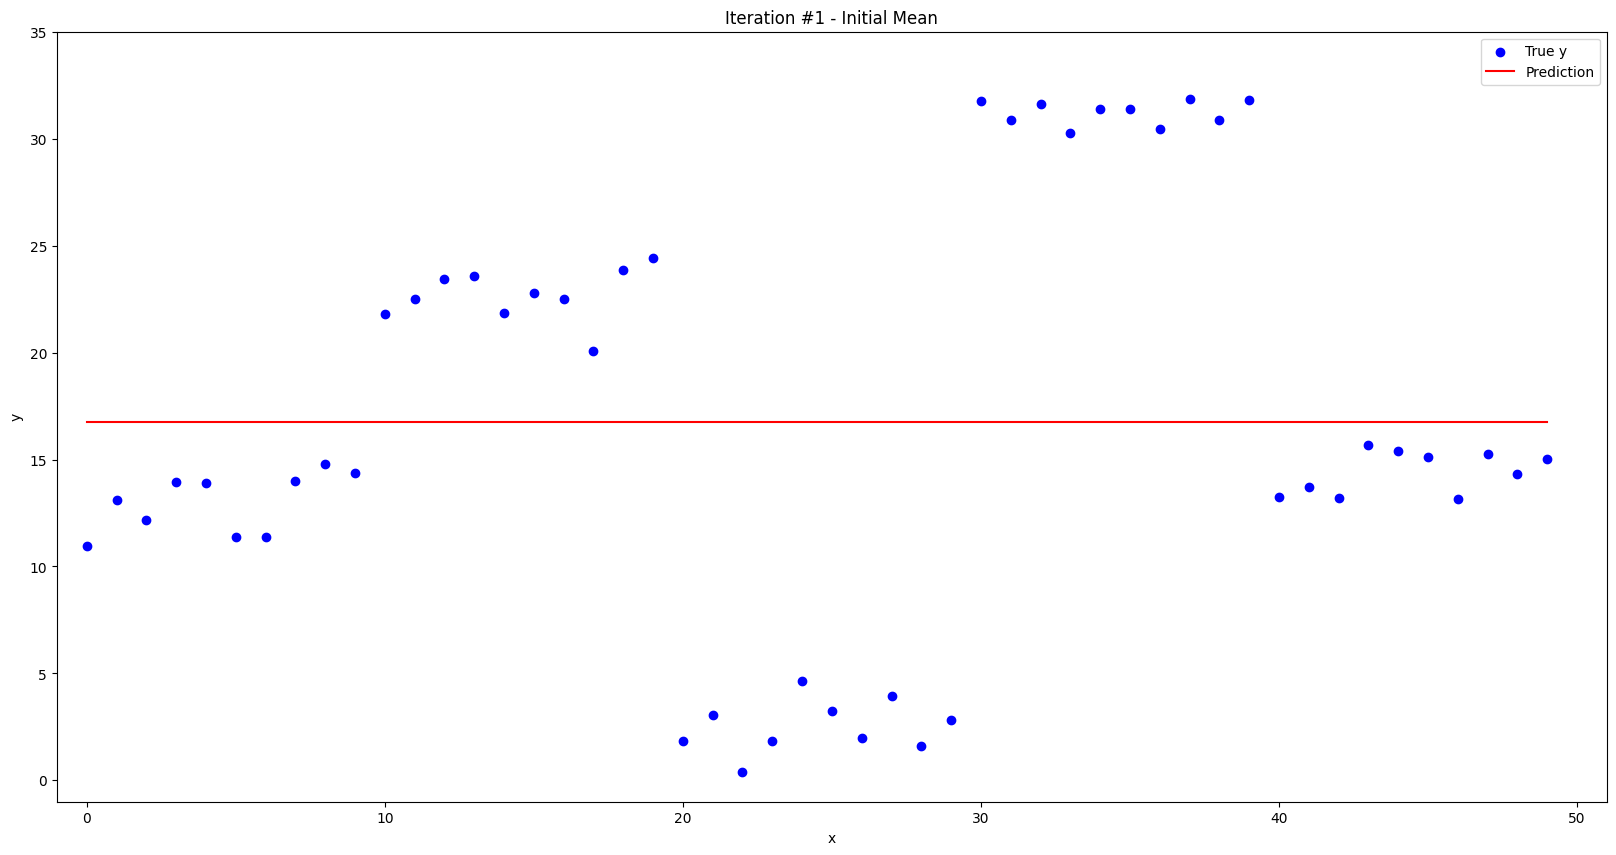

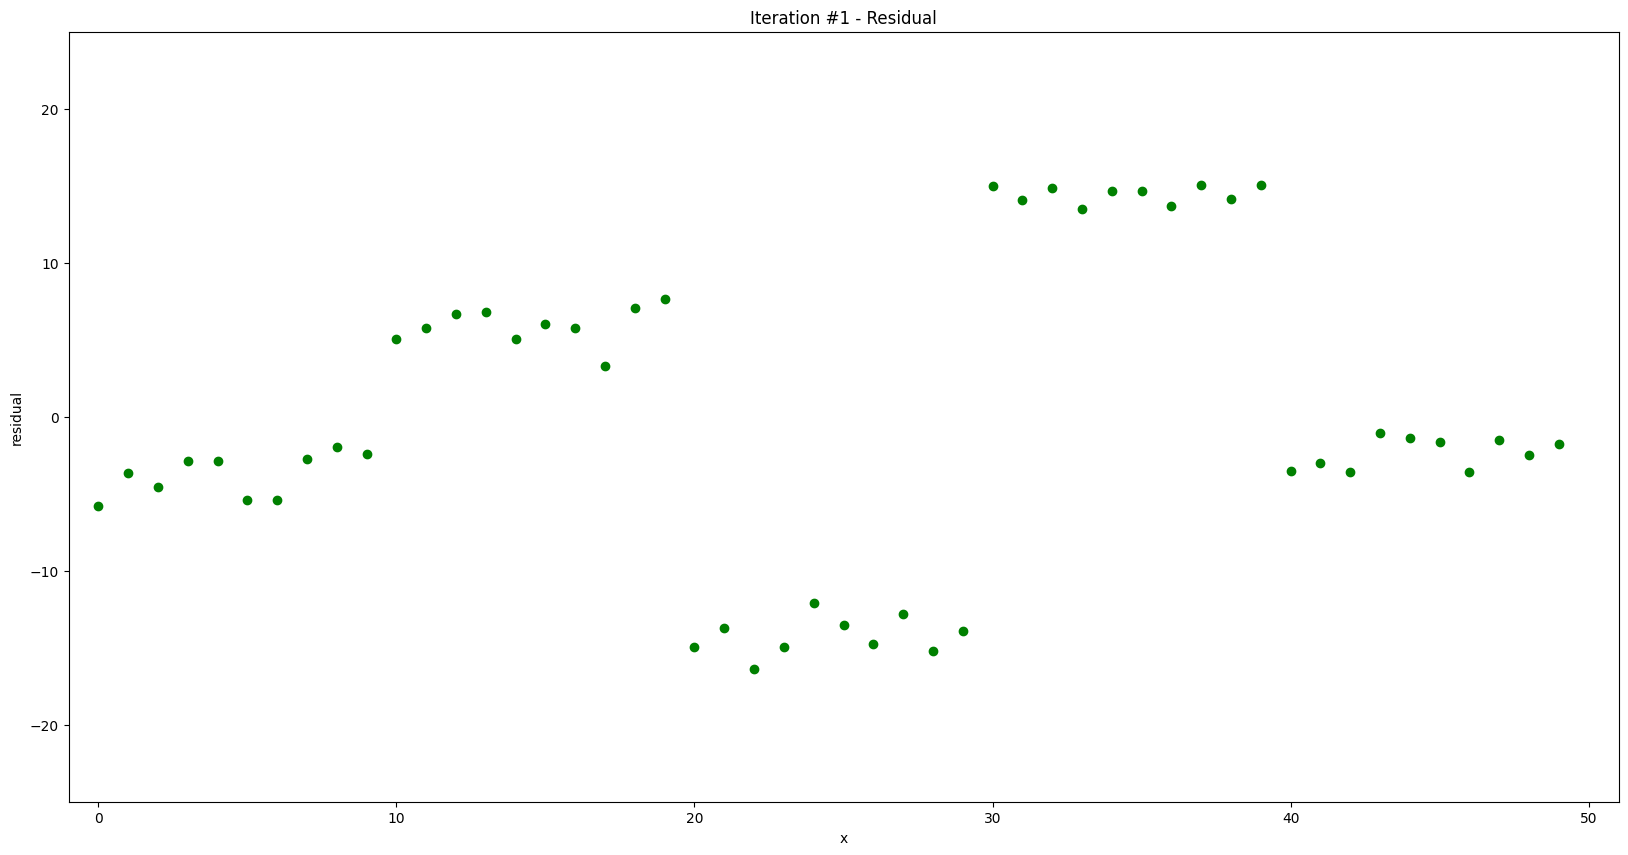

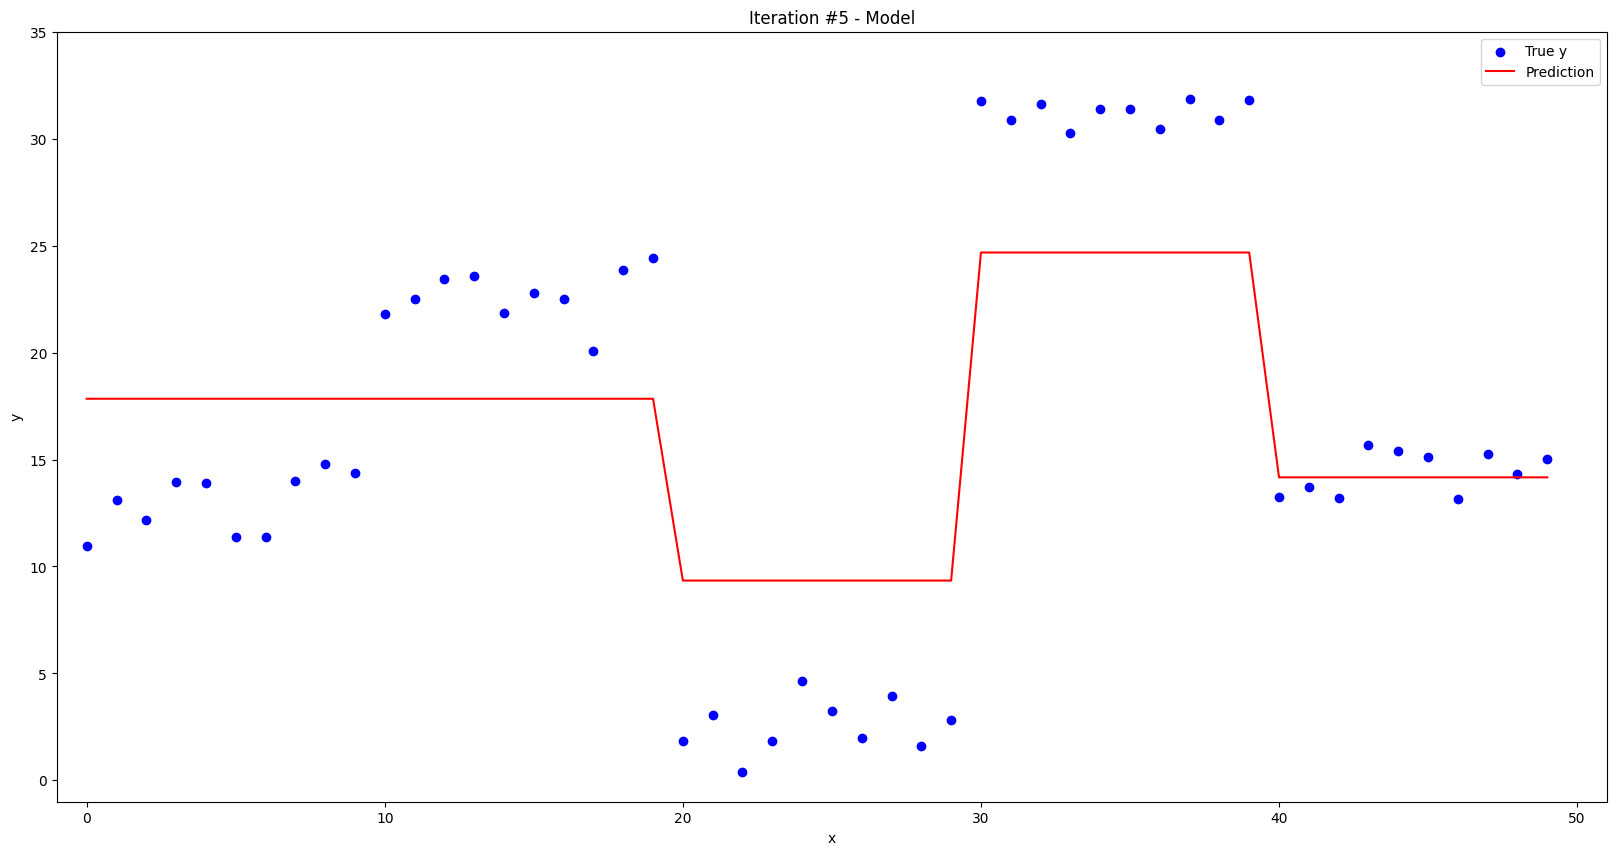

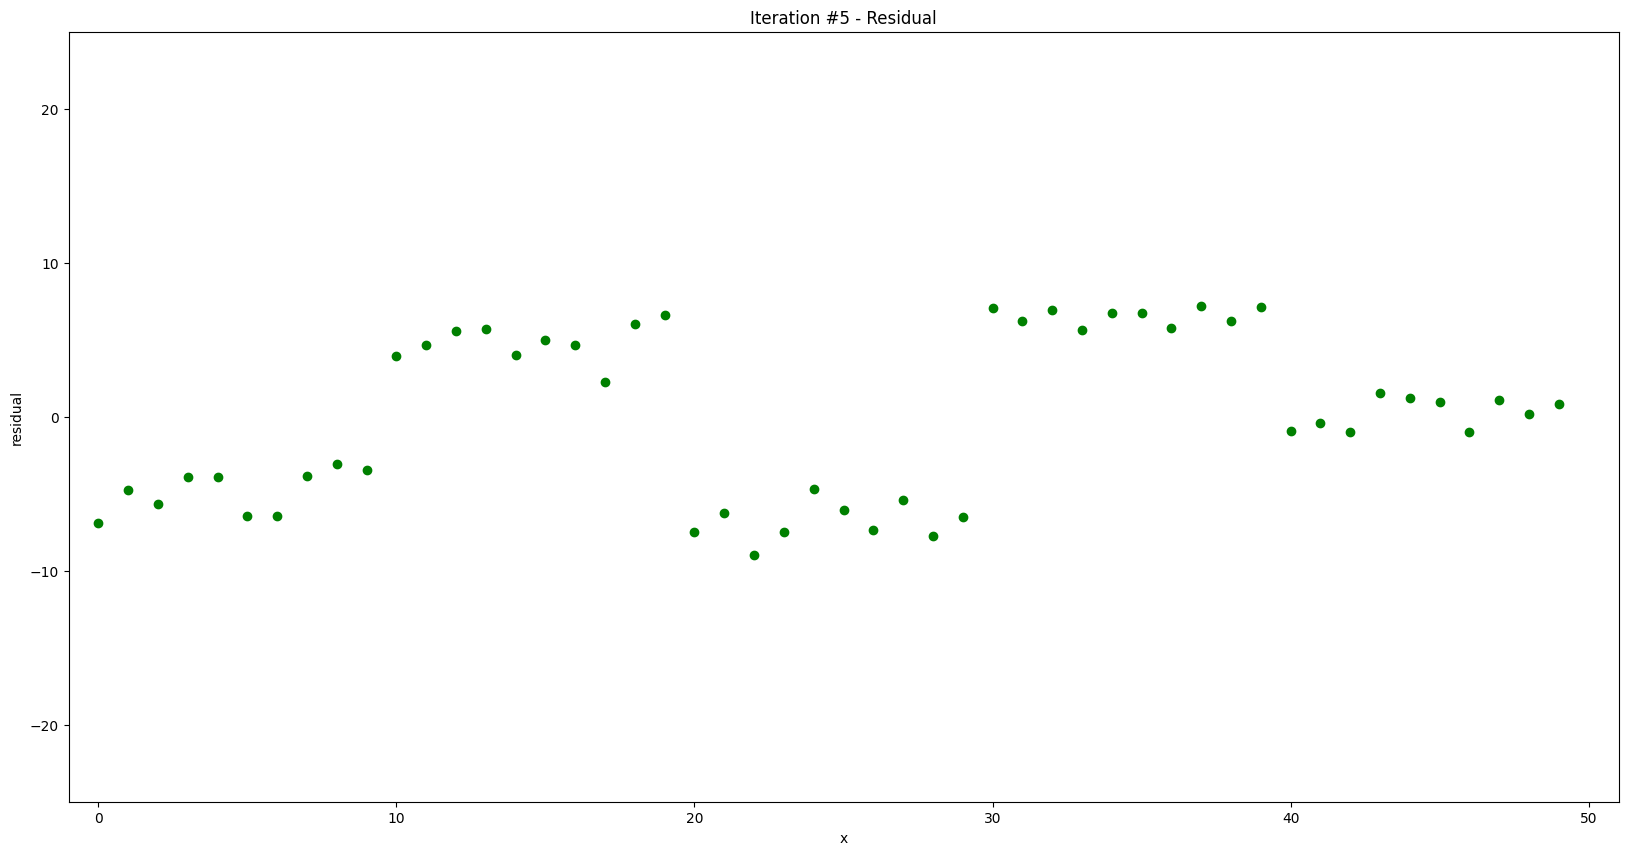

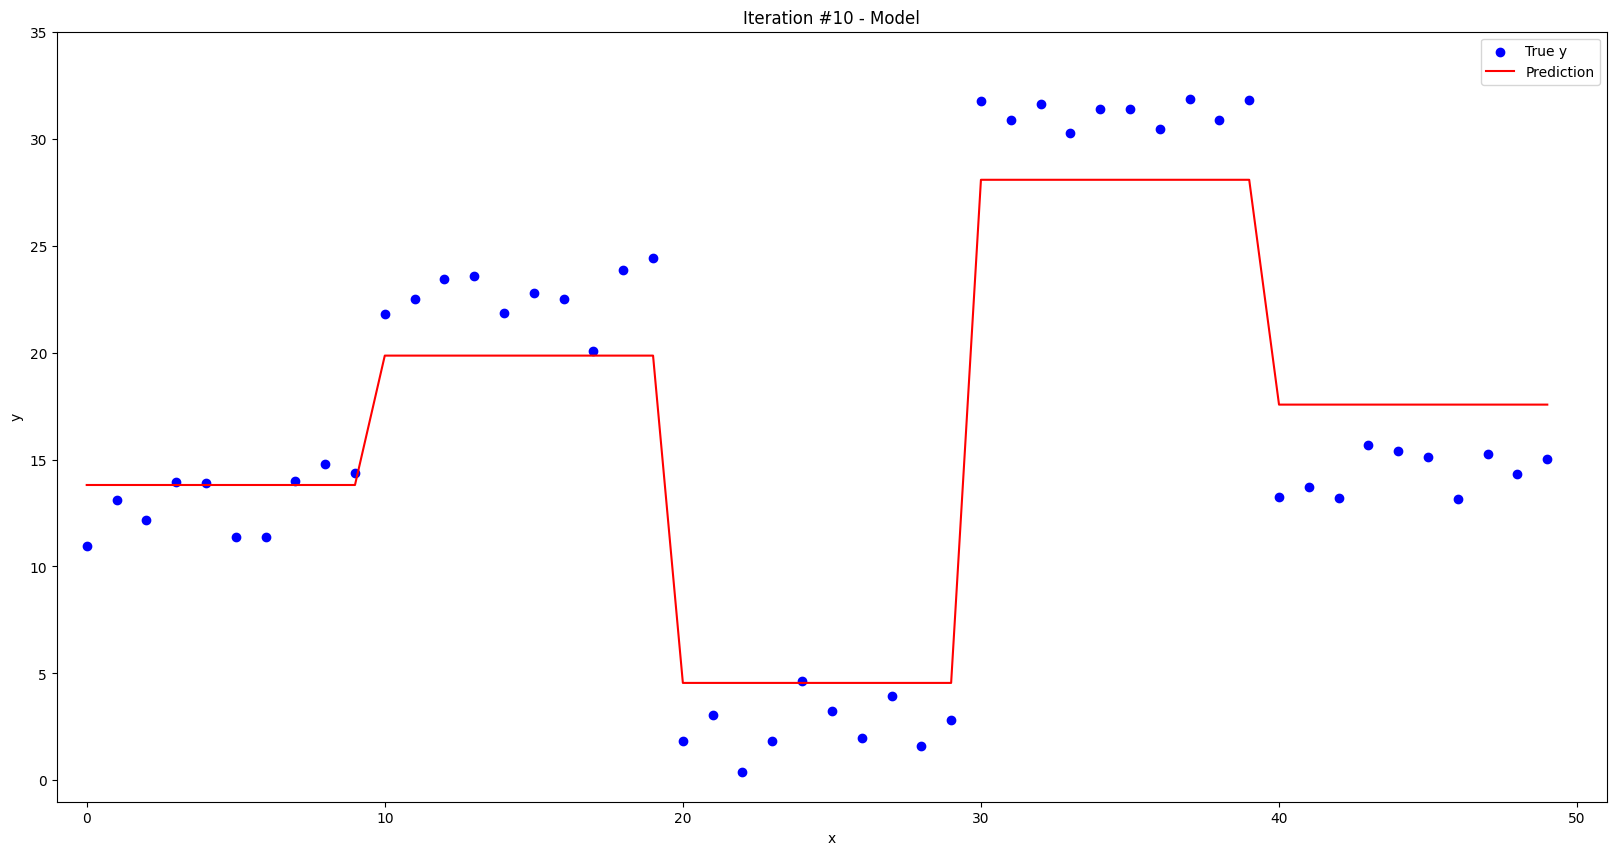

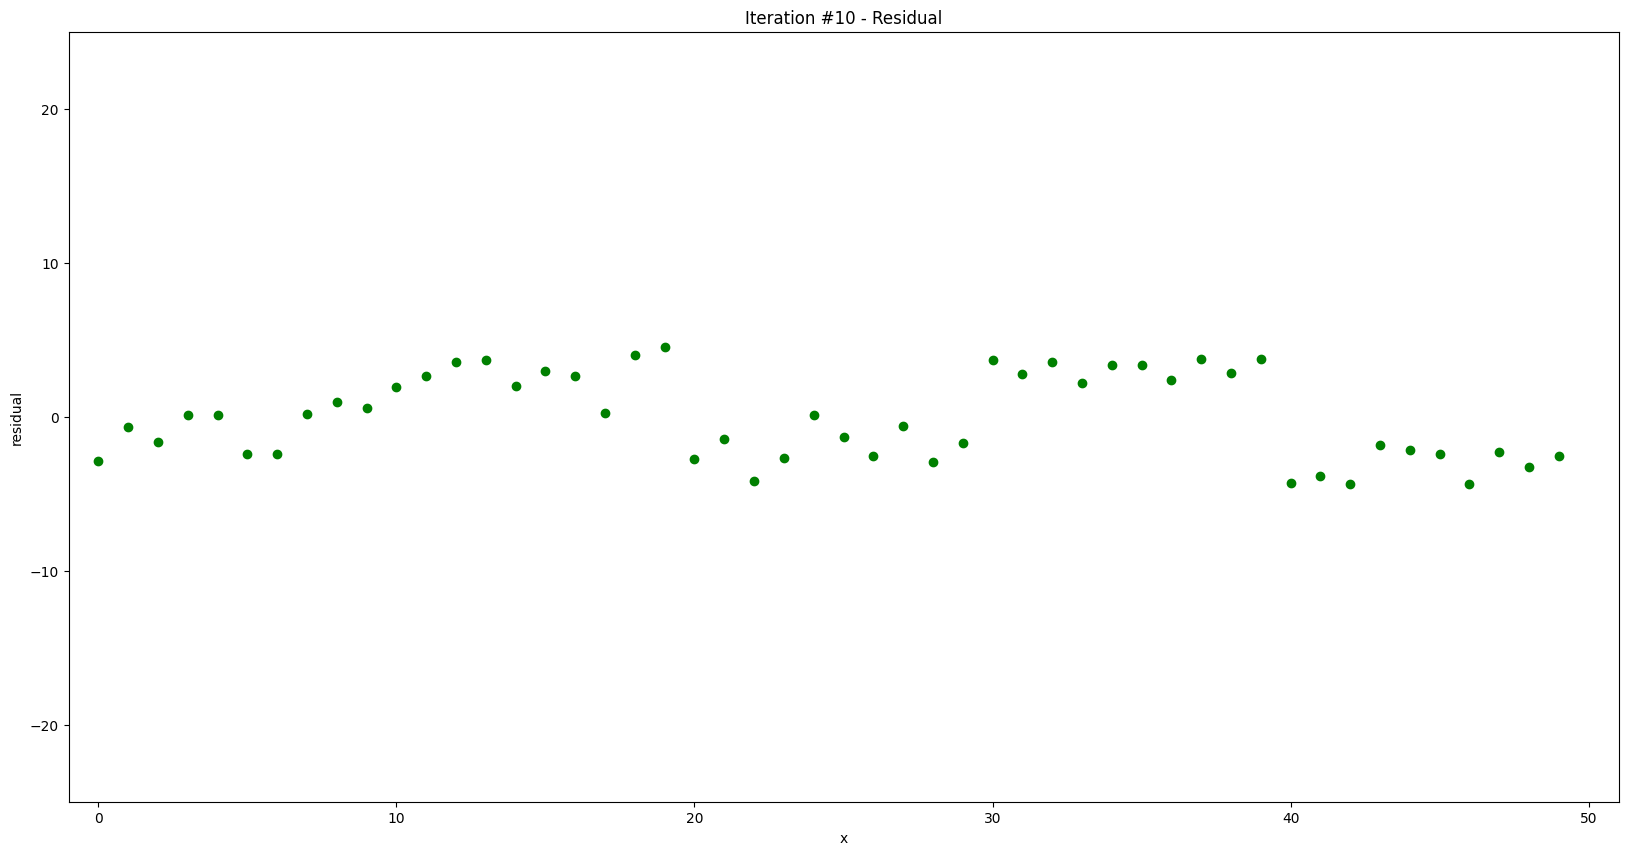

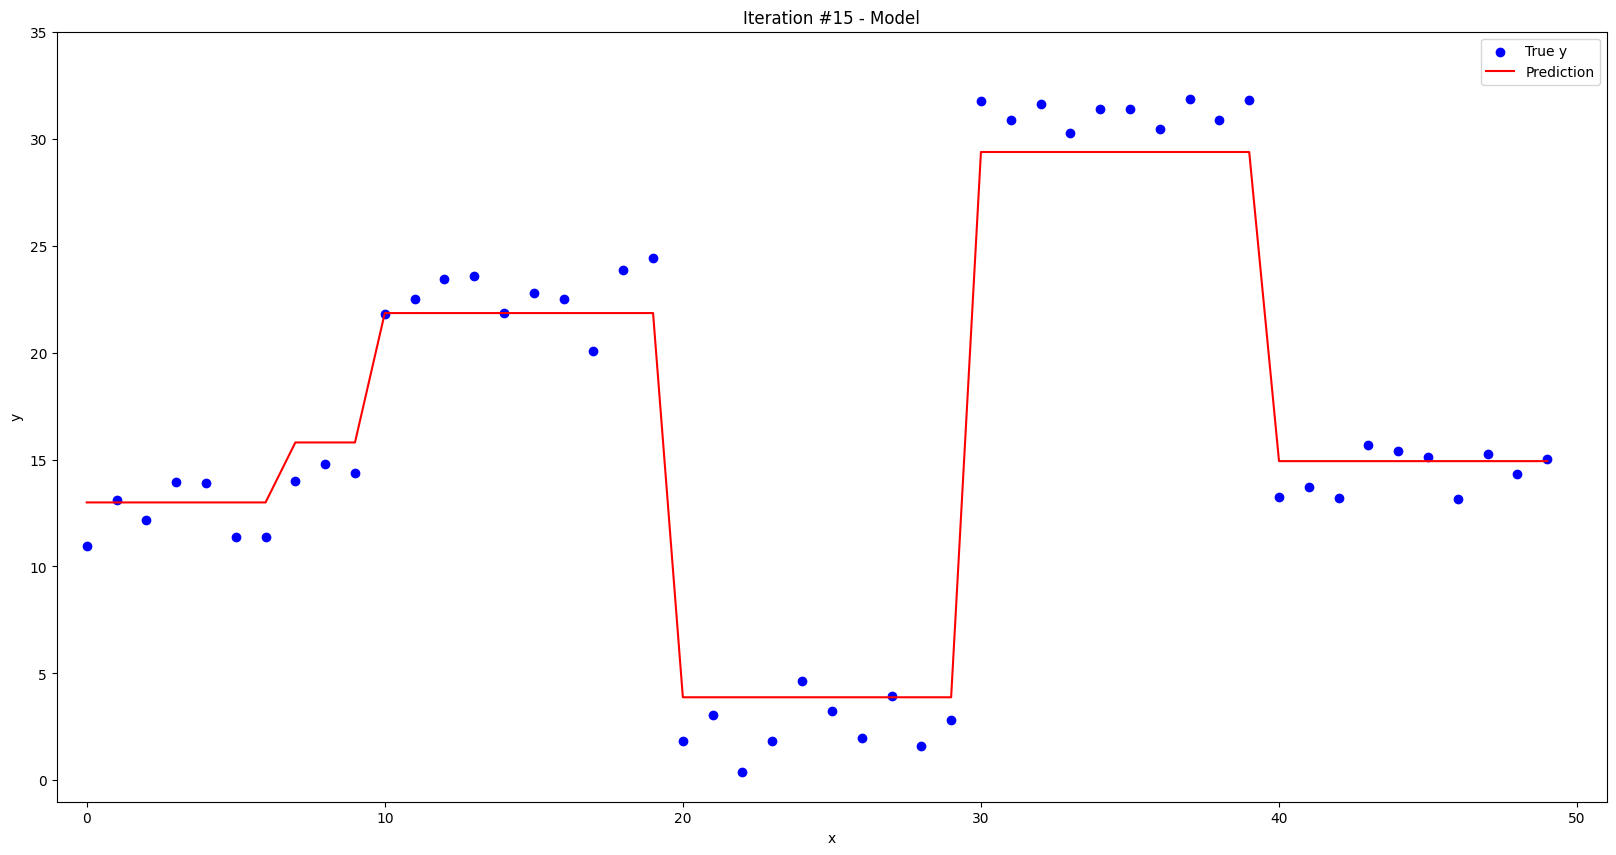

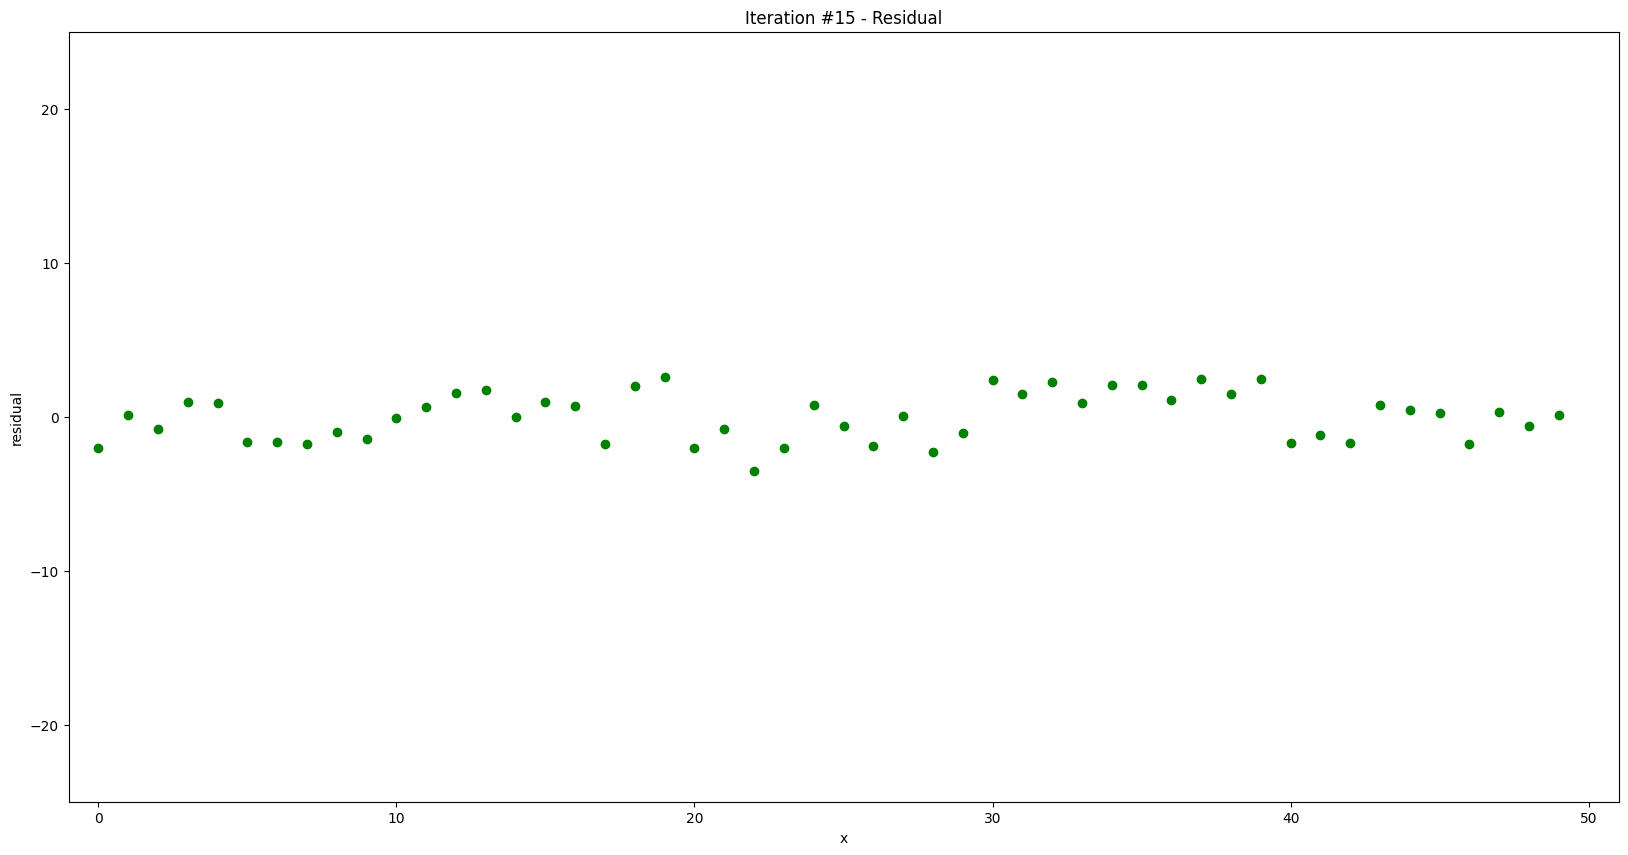

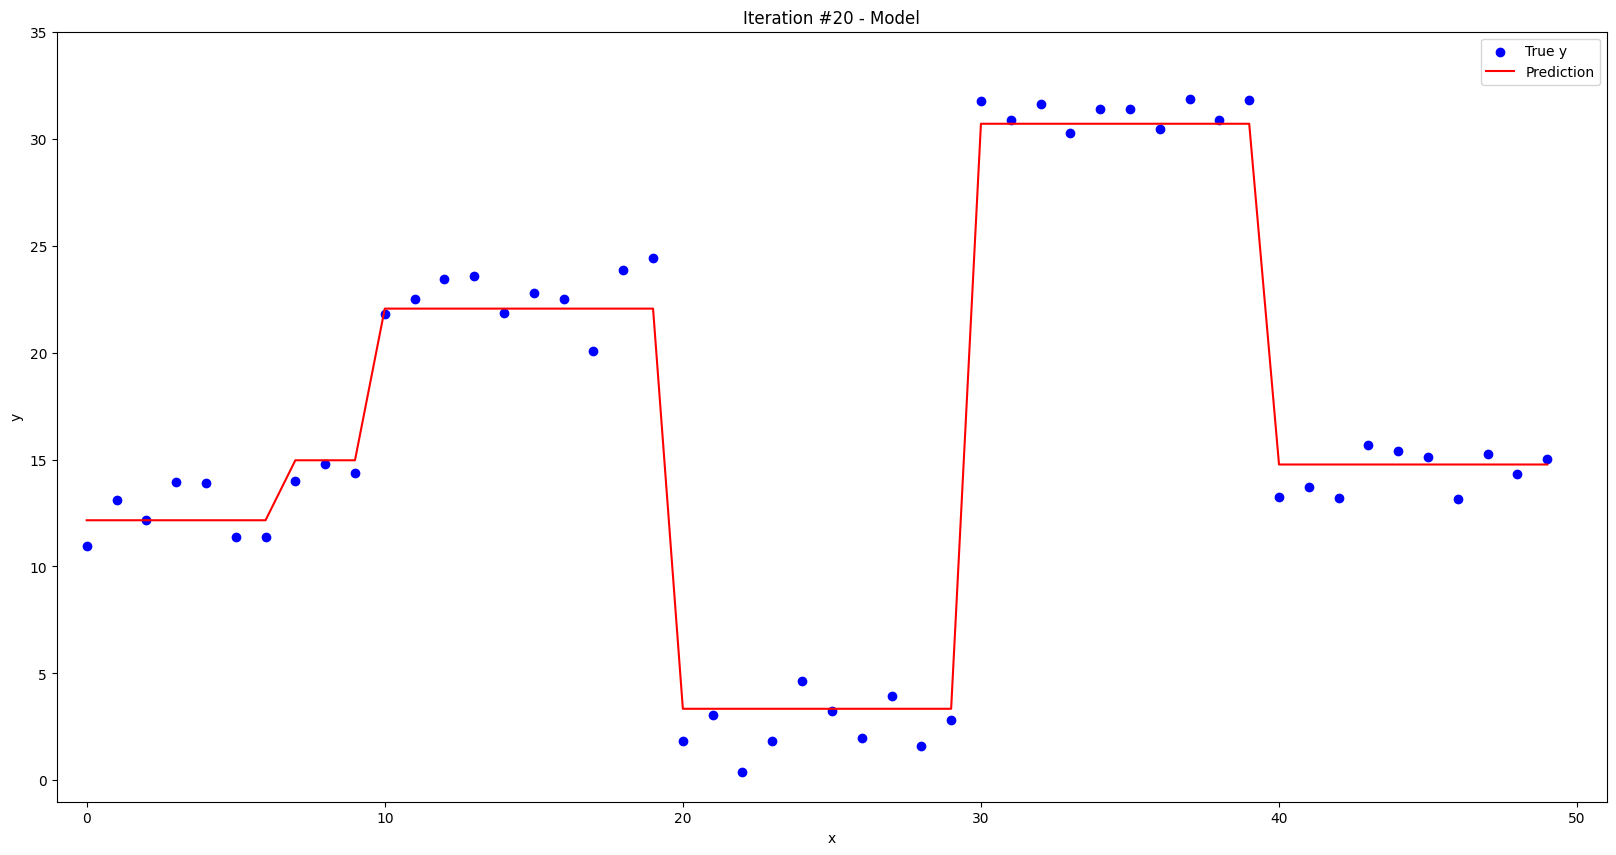

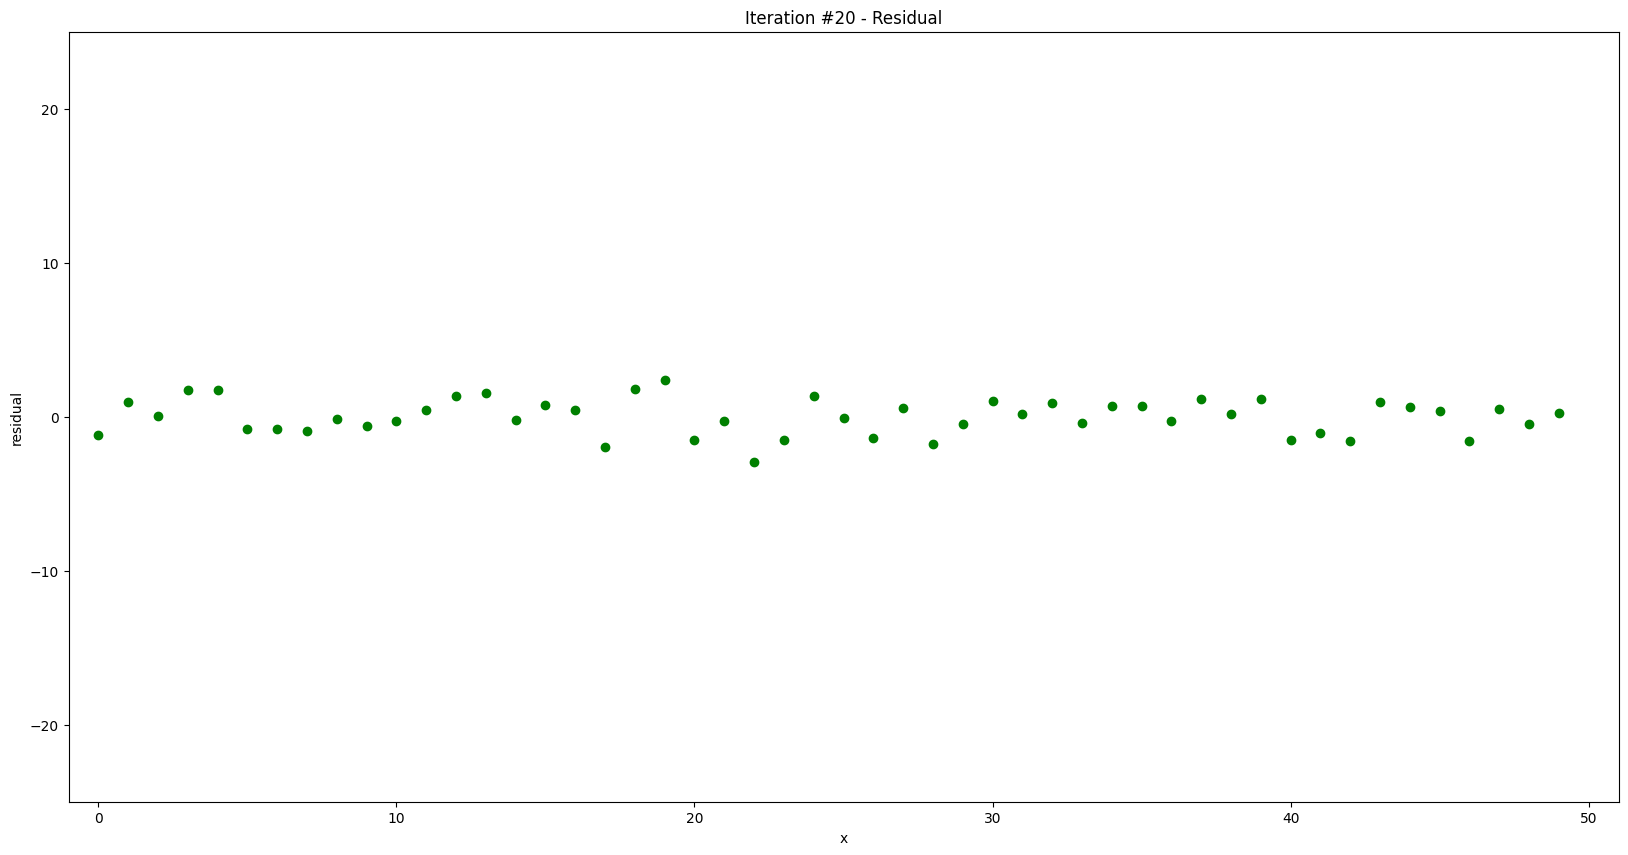

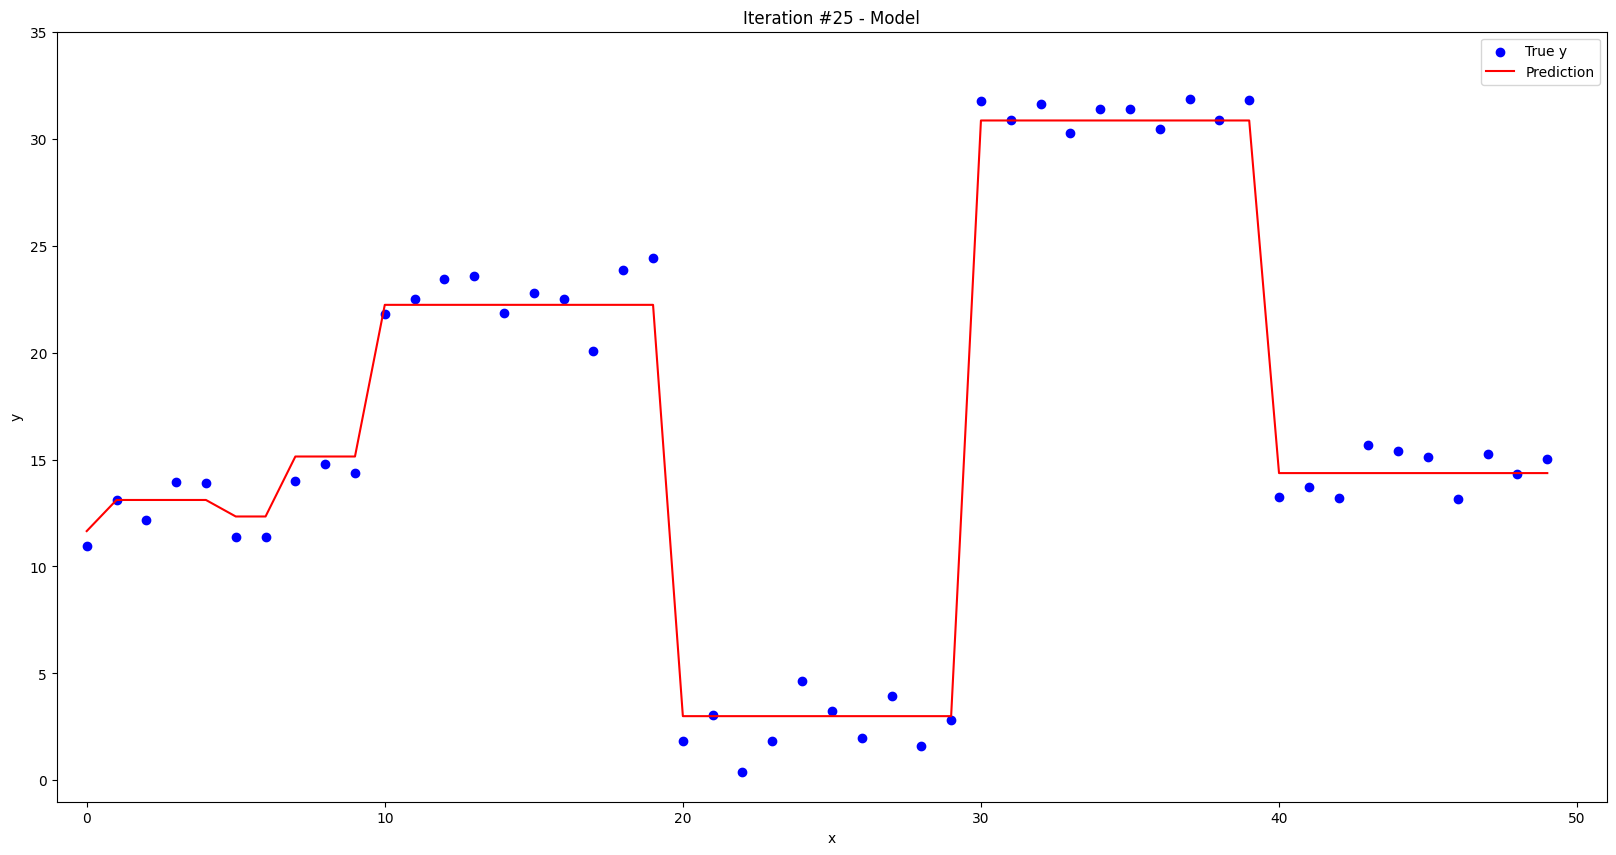

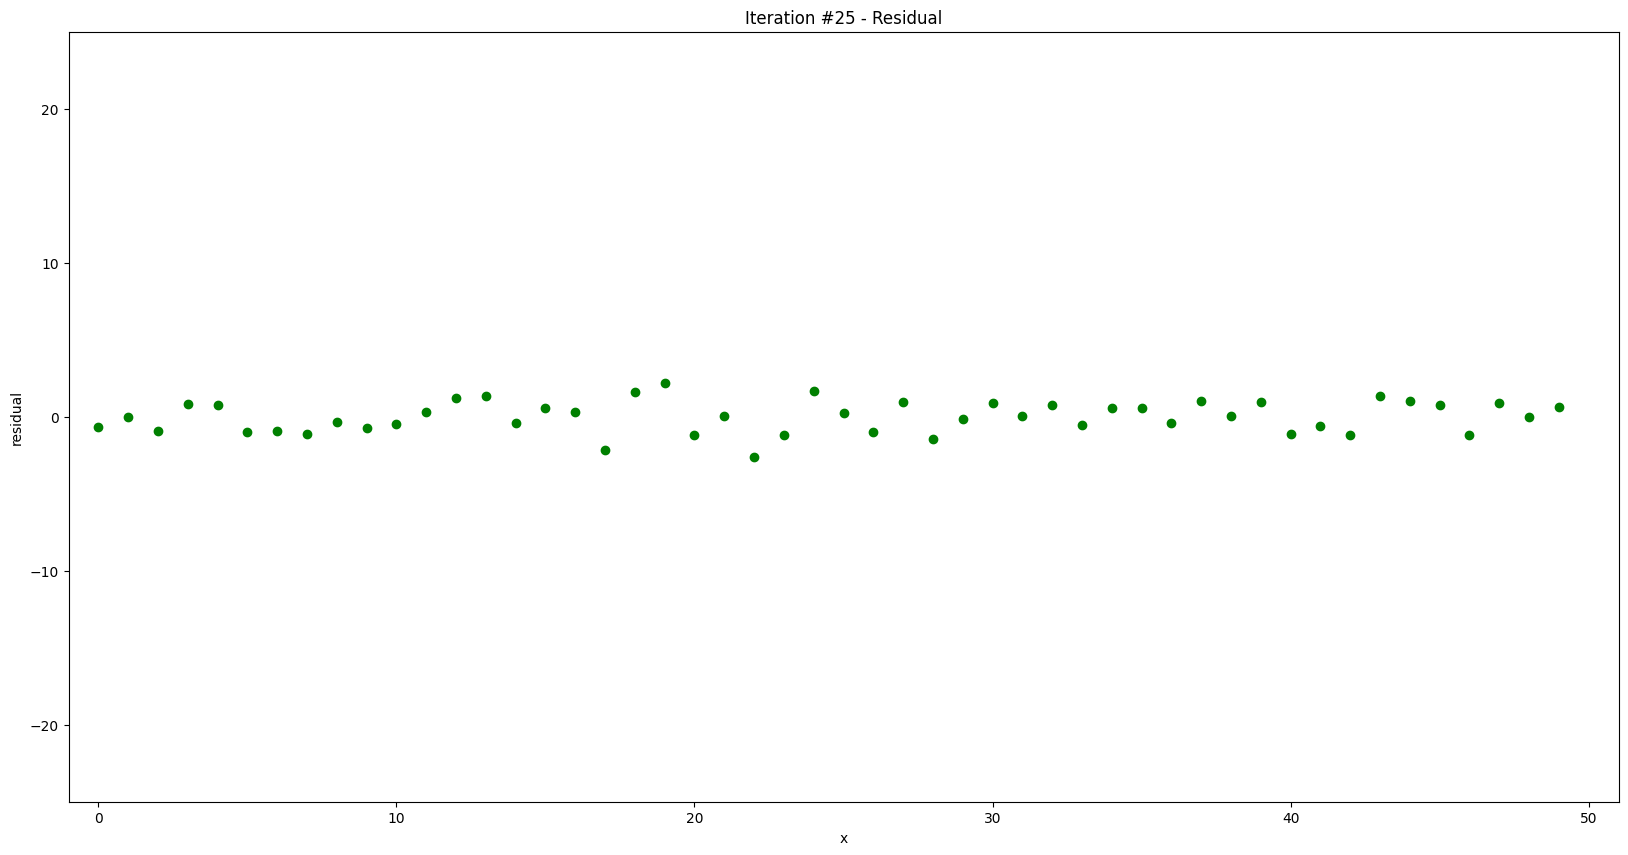

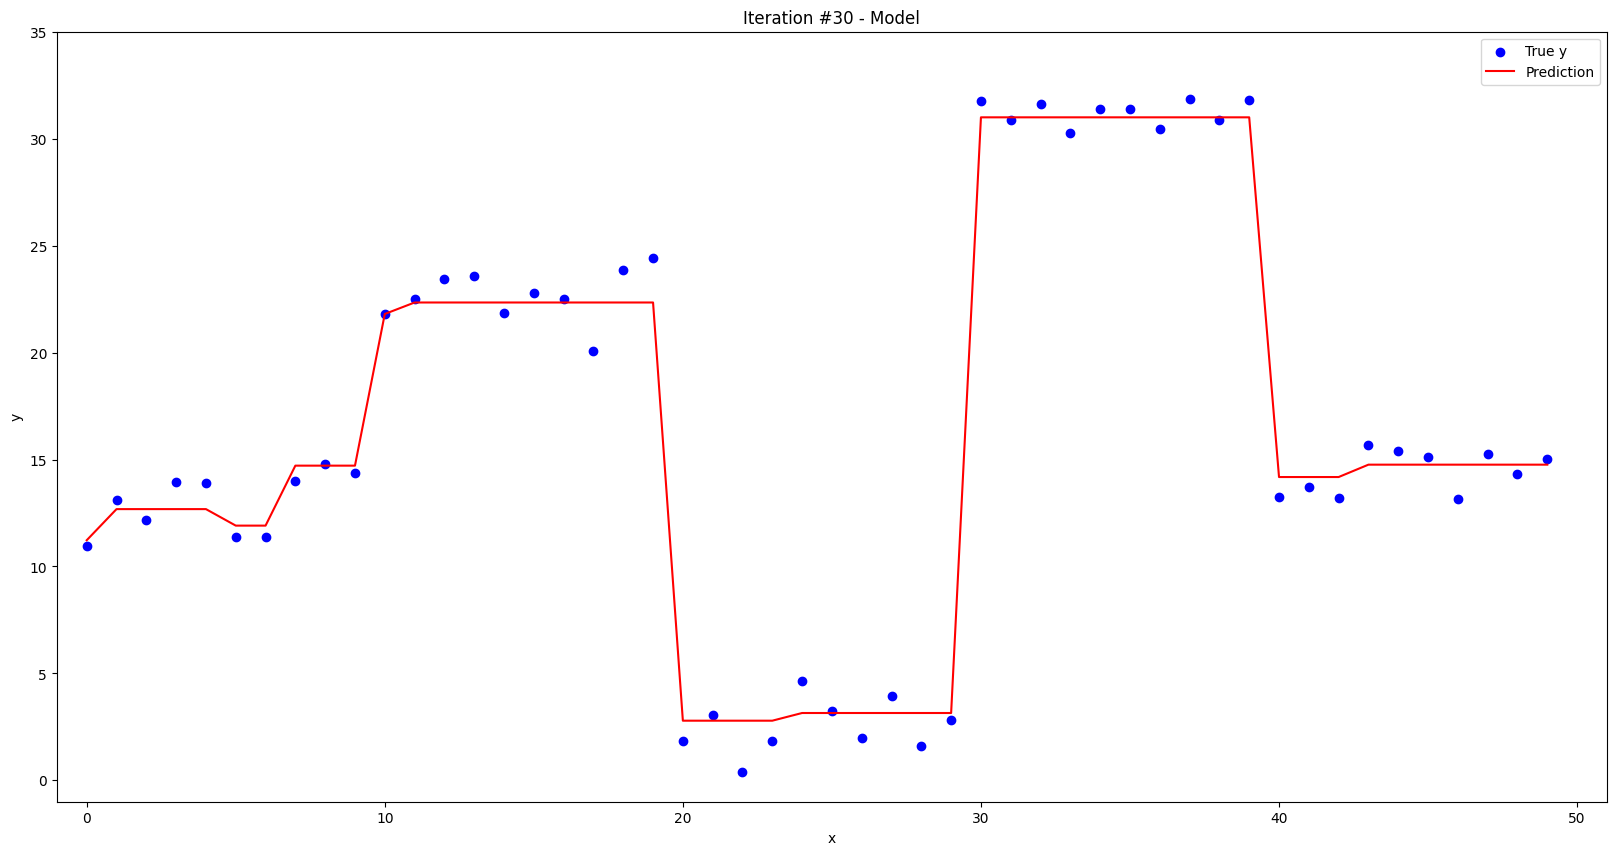

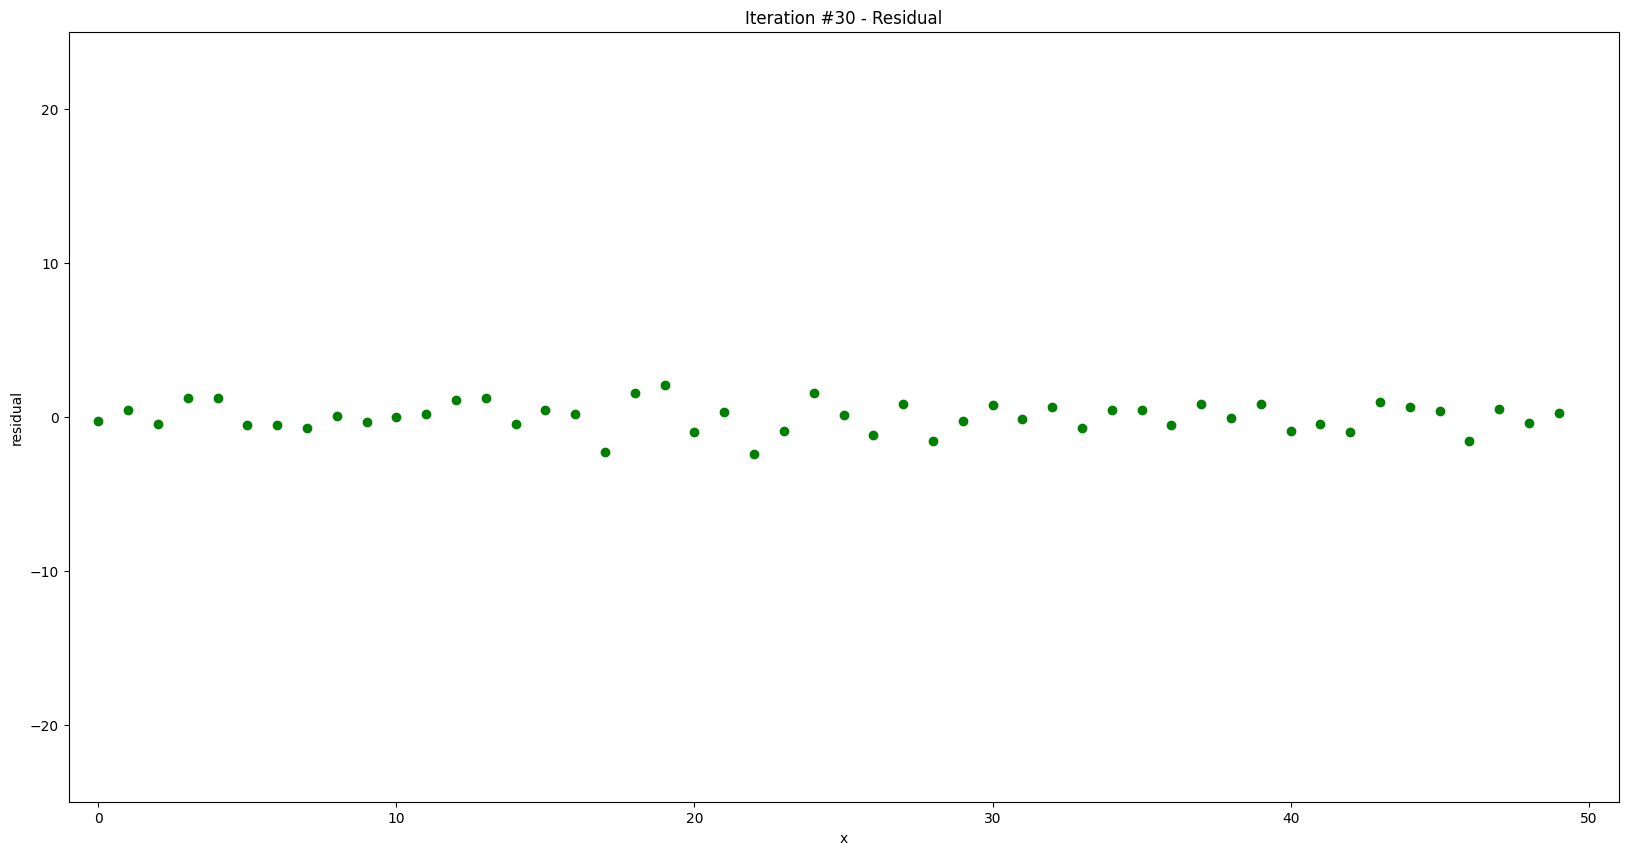

In [ ]:
X, y = GenerateData()
final_prediction = GradientBoosting(X, y, n_iterations=30, max_depth=1, plot=True)

# Final Quiz

[Quiz link](https://app.wooclap.com/USSDDI?from=event-page)